<a href="https://colab.research.google.com/github/AleemRahil/AI-DS/blob/main/DS_for_Finance_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=389416a3611189109e767ddffc23db2dfa4ad1d10eeedb8f9c176d124c4b7878
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [6]:
# Data Management
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from ta import add_all_ta_features
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import sklearn.mixture as mix

# Statistice
from statsmodels.tsa.stattools import adfuller

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Supervised Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

# Reporting
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SydneyHousePrices.csv')
print(f'Length of Data: {len(df)}')
df.head()

Length of Data: 199504


,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [5]:
suburb_text_unique = df['suburb'].unique()
print('Unique Suburbs: ', len(suburb_text_unique))
print('Perform Label Encoding')

Unique Suburbs:  685
Perform Label Encoding


In [6]:
proptype_text_unique = df['propType'].unique()
print('Unique Prop Types: ', len(proptype_text_unique))
print('Perform OneHot Encoding')

Unique Prop Types:  8
Perform OneHot Encoding


In [7]:
labelencoder = LabelEncoder()
encoded_suburbs = labelencoder.fit_transform(df['suburb'])
df['suburbs_encoded'] = encoded_suburbs
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,suburbs_encoded
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,22
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,22
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house,654
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house,22
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house,654


In [8]:
onehot_encoded = pd.get_dummies(df['propType'], prefix='pt', drop_first=True)
df = df.join(onehot_encoded)
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,suburbs_encoded,pt_duplex/semi-detached,pt_house,pt_other,pt_terrace,pt_townhouse,pt_villa,pt_warehouse
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,22,0,1,0,0,0,0,0
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,22,0,1,0,0,0,0,0
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house,654,0,1,0,0,0,0,0
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house,22,0,1,0,0,0,0,0
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house,654,0,1,0,0,0,0,0


In [9]:
df['TARGET'] = df['sellPrice']
df.head(3)

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType,suburbs_encoded,pt_duplex/semi-detached,pt_house,pt_other,pt_terrace,pt_townhouse,pt_villa,pt_warehouse,TARGET
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house,22,0,1,0,0,0,0,0,1210000
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house,22,0,1,0,0,0,0,0,2250000
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house,654,0,1,0,0,0,0,0,2920000


In [10]:
df_drop = df.copy()
df_drop.drop(columns=['Date', 'Id', 'suburb', 'propType', 'sellPrice'], inplace=True)
df_drop.head()

,postalCode,bed,bath,car,suburbs_encoded,pt_duplex/semi-detached,pt_house,pt_other,pt_terrace,pt_townhouse,pt_villa,pt_warehouse,TARGET
0,2107,4.0,2,2.0,22,0,1,0,0,0,0,0,1210000
1,2107,4.0,3,4.0,22,0,1,0,0,0,0,0,2250000
2,2107,3.0,3,2.0,654,0,1,0,0,0,0,0,2920000
3,2107,3.0,1,2.0,22,0,1,0,0,0,0,0,1530000
4,2107,5.0,4,4.0,654,0,1,0,0,0,0,0,8000000


In [11]:
is_null = df_drop.isnull().values.any()
is_inf = df_drop.isin([np.inf, -np.inf]).values.any()
print('Is Null: ', is_null)
print('Is Null: ', is_inf)

Is Null:  True
Is Null:  False


In [12]:
df_drop = df_drop.fillna(df_drop.mean())
df_drop.isnull().values.any()

False

In [13]:
df_scaling = df_drop.copy()
mms = MinMaxScaler()
df_scaling.iloc[:] = mms.fit_transform(df_scaling)
df_scaling.head()

<ipython-input-13-b4e313a267fc>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_scaling.iloc[:] = mms.fit_transform(df_scaling)


,postalCode,bed,bath,car,suburbs_encoded,pt_duplex/semi-detached,pt_house,pt_other,pt_terrace,pt_townhouse,pt_villa,pt_warehouse,TARGET
0,0.037179,0.030612,0.010204,0.025,0.032164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000563
1,0.037179,0.030612,0.020408,0.075,0.032164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001048
2,0.037179,0.020408,0.020408,0.025,0.956140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001360
3,0.037179,0.020408,0.000000,0.025,0.032164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000712
4,0.037179,0.040816,0.030612,0.075,0.956140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.003725


In [14]:
is_deep_learning = False
df_tts = df_scaling.copy() if is_deep_learning else df_drop.copy()
df_tts.head(3)

,postalCode,bed,bath,car,suburbs_encoded,pt_duplex/semi-detached,pt_house,pt_other,pt_terrace,pt_townhouse,pt_villa,pt_warehouse,TARGET
0,2107,4.0,2,2.0,22,0,1,0,0,0,0,0,1210000
1,2107,4.0,3,4.0,22,0,1,0,0,0,0,0,2250000
2,2107,3.0,3,2.0,654,0,1,0,0,0,0,0,2920000


In [15]:
X = df_tts.iloc[:,:-1].values
y = df_tts.iloc[:,-1].values
print('X values: \n', X[:2])
print('y values: \n', y[:2])

X values: 
 [[2.107e+03 4.000e+00 2.000e+00 2.000e+00 2.200e+01 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.107e+03 4.000e+00 3.000e+00 4.000e+00 2.200e+01 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
y values: 
 [1210000 2250000]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, shuffle=True)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (179553, 12)
X_test:  (19951, 12)
y_train:  (179553,)
y_test:  (19951,)


In [17]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [18]:
y_pred = regressor.predict(X_test)
y_pred = [round(x,0) for x in y_pred]
y_pred[:5], y_test[:5]

([590029.0, 2022675.0, 1112679.0, 1045638.0, 869990.0],
 array([ 730000, 1350100,  860000, 1390000,  985000]))

In [19]:
cv = RepeatedKFold(n_repeats=3, n_splits=5, random_state=1)
n_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
                           error_score='raise')

In [20]:
print('MAE Avg: ', abs(n_scores.mean()))
print('MAE Std: ', n_scores.std())

MAE Avg:  389118.30686148786
MAE Std:  20152.482105475094


In [4]:
# Efficiency Testing Libraries
from statsmodels.tsa.stattools import bds
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.tsa.stattools import adfuller
import scipy.stats as sps

In [22]:
import yfinance as yf


start_date = '2019-12-31'
end_date = '2022-12-31'
symbol = ['ETH-USD']
df = yf.download(symbol, start=start_date, end=end_date)
df['Returns'] = df['Close'] / df['Close'].shift(1) - 1
df.dropna(inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330,0.009190
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256,-0.025931
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358,0.053069
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515,0.006690
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353,0.008939


In [23]:
returns = df['Returns'].values.astype(float)

In [24]:
returns_binary = [1 if x>0 else 0 for x in returns]

In [25]:
(z_stat, p_value) = runstest_1samp(returns_binary[:10], correction =False)
z_stat = round(z_stat, 3)
p_value = round(p_value, 3)
is_reject_runs = True if p_value < 0.05 else False
print(f'Z-Statistic: {z_stat}')
print(f'P-Value: {p_value}')
print(f'Reject Null: {is_reject_runs}')
print(f'Observable Runs Exceeds Expected Runs by: {z_stat} Standard Deviation')
print('Not Random') if is_reject_runs else print('Random')

Z-Statistic: -0.562
P-Value: 0.574
Reject Null: False
Observable Runs Exceeds Expected Runs by: -0.562 Standard Deviation
Random


In [26]:
bds_test = bds(returns[-500:], distance=2)
bds_stat = float(bds_test[0])
pvalue = float(bds_test[1])
print('BDS Test Statistic: ', round(bds_stat,3))
print('BDS P-Value: ', round(pvalue, 3))
print('Not Random') if pvalue < 0.05 else print('Random')

BDS Test Statistic:  1.812
BDS P-Value:  0.07
Random


In [27]:
def hurst(ts, min_lag=1, max_lag=100):
  lags = range(min_lag, max_lag)
  tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
  poly = polyfit(log(lags), log(tau), 1)
  return poly[0]*2.0

In [28]:
prices = df['Close'].values
hurst_res = hurst(prices)
hurst_res

0.4950809103916209

In [29]:
dftest = adfuller(returns)
p_value = dftest[1]
t_test = dftest[0] < dftest[4]['1%']
print(p_value, t_test)
print('If < 0.05 and True then we can reject the null Hypothesis and conclude that the index is stationery')

6.279800105486573e-17 True
If < 0.05 and True then we can reject the null Hypothesis and conclude that the index is stationery


In [30]:
!pip install pyhhmm

  Preparing metadata (setup.py) ... done
  Created wheel for pyhhmm: filename=pyhhmm-2.0.1-py3-none-any.whl size=35477 sha256=3852ac00de16917418cd8ce024c37b3586710c890f36c2f6d56c587aba27d751
  Stored in directory: /root/.cache/pip/wheels/ca/69/15/8982f3bd74e20bc98c02fbcaaac319525278ad9295410d5a41
Successfully built pyhhmm


In [31]:
!pip install yfinance

In [32]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 12.4 MB/s eta 0:00:00


In [33]:
from pyhhmm.gaussian import GaussianHMM

In [34]:
start_date = '2017-01-1'
end_date = '2022-12-31'
symbol = ['SPY']
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [35]:
df['Returns'] = df['Adj Close'] / df['Adj Close'].shift(1) - 1
df['Range'] = (df['High']/df['Low'])-1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Range
Date,,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535187,78744400,0.005949,0.005053
2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374252,78379000,-0.000795,0.004879
2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098297,71559900,0.003578,0.008189
2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427933,46939700,-0.003301,0.002871
2017-01-10,226.479996,227.449997,226.009995,226.460007,202.427933,63771900,0.000000,0.006371


In [36]:
X_train = df[['Returns', 'Range']]
X_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000795,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


In [37]:
hmm_model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
hmm_model.train([np.array(X_train.values)])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(<pyhhmm.gaussian.GaussianHMM at 0x7f05a4e83340>, 10354.275844564168)

In [38]:
hidden_states = hmm_model.predict([X_train.values])[0]
print(len(hidden_states))

1509


In [39]:
hmm_model.means

array([[ 0.00214276,  0.00807733],
       [-0.0044136 ,  0.01368444],
       [ 0.00432787,  0.00795723],
       [-0.0039953 ,  0.0296799 ]])

In [40]:
hmm_model.covars

array([[[5.56864713e-05, 2.74115937e-05],
        [2.74115937e-05, 3.68940110e-05]],

       [[1.22298318e-04, 9.53538012e-06],
        [9.53538012e-06, 7.15138809e-05]],

       [[5.63200619e-05, 4.05143234e-05],
        [4.05143234e-05, 4.31983613e-05]],

       [[7.72168052e-04, 2.62775551e-05],
        [2.62775551e-05, 2.60846691e-04]]])

In [51]:
i=0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df['Adj Close'].values.astype(float)
print('Correct number of rows: ', len(prices) == len(hidden_states))

Correct number of rows:  True


In [52]:
for s in hidden_states:
  if s==0:
    labels_0.append(prices[i])
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
  if s==1:
    labels_0.append(float('nan'))
    labels_1.append(prices[i])
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
  if s==2:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(prices[i])
    labels_3.append(float('nan'))
  if s==3:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(prices[i])
  i+= 1

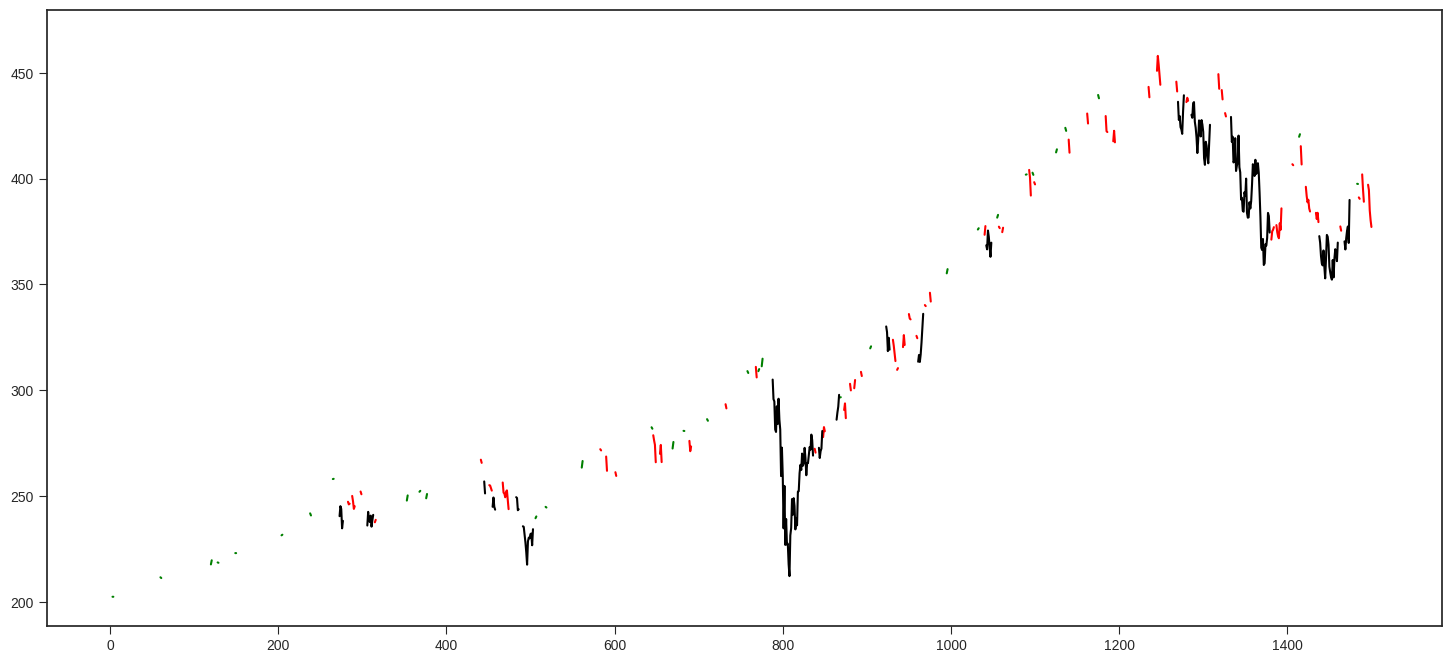

In [86]:
fig = plt.figure(figsize=(18,8))
plt.plot(labels_0, color='green')
plt.plot(labels_1, color='red')
plt.plot(labels_2, color='orange')
plt.plot(labels_3, color='black')
plt.show()

In [54]:
df['MA_12'] = df['Adj Close'].rolling(window=12).mean()
df['MA_21'] = df['Adj Close'].rolling(window=21).mean()

In [45]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21
Date,,,,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535187,78744400,0.005949,0.005053,NaN,NaN
2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374252,78379000,-0.000795,0.004879,NaN,NaN
2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098297,71559900,0.003578,0.008189,NaN,NaN
2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427933,46939700,-0.003301,0.002871,NaN,NaN
2017-01-10,226.479996,227.449997,226.009995,226.460007,202.427933,63771900,0.000000,0.006371,NaN,NaN


In [46]:
X_train = df[['Returns', 'Range']].iloc[:500]
X_test = df[['Returns', 'Range']].iloc[500:]
save_df = df.iloc[500:]

print('Train Length: ', len(X_train))
print('Test Length: ', len(X_test))

print('X_train From: ', X_train.head(1).index.item())
print('X_train To: ', X_train.tail(1).index.item())
print('X_test From: ', X_test.head(1).index.item())
print('X_test To: ', X_test.tail(1).index.item())

Train Length:  500
Test Length:  1009
X_train From:  2017-01-04 00:00:00
X_train To:  2018-12-28 00:00:00
X_test From:  2018-12-31 00:00:00
X_test To:  2022-12-30 00:00:00


In [57]:
hmm_model2 = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
hmm_model2.train([np.array(X_train.values)])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(<pyhhmm.gaussian.GaussianHMM at 0x7f05a11d6d40>, 3674.472034126801)

In [58]:
df_main = save_df.copy()
df_main.drop(columns = ['High', 'Low'], inplace= True)

hmm_results = hmm_model2.predict([X_test.values])[0]
df_main['HMM'] = hmm_results
df_main.head()

,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM
Date,,,,,,,,,
2018-12-31,249.559998,249.919998,232.067383,144299400,0.008759,0.010991,231.581399,238.991971,2
2019-01-02,245.979996,250.179993,232.308777,126925200,0.001040,0.021387,230.525205,238.009930,3
2019-01-03,248.229996,244.210007,226.765244,144140700,-0.023863,0.020109,229.384014,236.690497,3
2019-01-04,247.589996,252.389999,234.360931,142628800,0.033496,0.024032,229.268917,235.572310,1
2019-01-07,252.690002,254.380005,236.208755,103139100,0.007885,0.016926,229.329347,234.939955,2


In [59]:
df_main.tail()

,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM
Date,,,,,,,,,
2022-12-23,379.649994,382.910004,380.042480,59857300,0.005752,0.013306,385.614047,389.812964,1
2022-12-27,382.790009,381.399994,378.543793,51638200,-0.003943,0.009219,384.536448,388.910681,1
2022-12-28,381.329987,376.660004,373.839264,70911500,-0.012428,0.018517,383.310506,388.086410,3
2022-12-29,379.630005,383.440002,380.568512,66970900,0.018000,0.013902,382.178518,387.614569,1
2022-12-30,380.640015,382.429993,379.566040,84022200,-0.002634,0.010966,380.714345,386.509264,1


In [60]:
df_main[df_main['HMM']==0]

,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM
Date,,,,,,,,,
2020-03-02,298.209991,309.089996,292.445465,238703600,0.043307,0.049922,305.100972,308.665594,0
2020-03-04,306.119995,312.859985,296.012390,176613400,0.042033,0.032209,300.247223,307.190050,0
2020-03-10,284.640015,288.420013,272.888519,276444100,0.051745,0.054918,285.823962,299.732136,0
2020-03-13,263.089996,269.320007,254.817032,329566100,0.085486,0.092387,273.620202,290.019682,0
2020-03-17,245.039993,252.800003,239.186676,262070500,0.053992,0.080567,265.647317,281.819268,0
2020-03-26,249.520004,261.200012,248.587570,257632800,0.058390,0.055210,234.559461,254.714479,0
2020-04-02,245.190002,251.830002,239.669983,177660400,0.023075,0.033076,234.073193,244.005537,0
2020-04-06,257.839996,264.859985,252.070770,188061200,0.067166,0.075875,236.876701,240.227556,0
2022-06-15,377.359985,379.200012,371.502502,125666800,0.014256,0.031656,392.575005,391.718346,0


In [61]:
df_main.loc[df_main['MA_12'] > df_main['MA_21'], 'MA_Signal'] = 1
df_main.loc[df_main['MA_12'] <= df_main['MA_21'], 'MA_Signal'] = 0
print(df_main['MA_Signal'].value_counts())
df_main.head()

1.0    690
0.0    319
Name: MA_Signal, dtype: int64


,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_Signal
Date,,,,,,,,,,
2018-12-31,249.559998,249.919998,232.067383,144299400,0.008759,0.010991,231.581399,238.991971,2,0.0
2019-01-02,245.979996,250.179993,232.308777,126925200,0.001040,0.021387,230.525205,238.009930,3,0.0
2019-01-03,248.229996,244.210007,226.765244,144140700,-0.023863,0.020109,229.384014,236.690497,3,0.0
2019-01-04,247.589996,252.389999,234.360931,142628800,0.033496,0.024032,229.268917,235.572310,1,0.0
2019-01-07,252.690002,254.380005,236.208755,103139100,0.007885,0.016926,229.329347,234.939955,2,0.0


In [62]:
favorable_states = [1,3]
hmm_values = df_main['HMM'].values
hmm_values = [1 if x in favorable_states else 0 for x in hmm_values]
df_main['HMM_Signal'] = hmm_values
df_main['HMM_Signal'].value_counts()

0    550
1    459
Name: HMM_Signal, dtype: int64

In [63]:
df_main['Main_Signal'] = 0
df_main.loc[(df_main['MA_Signal'] == 1) & (df_main['MA_Signal'] == 1), 'Main_Signal'] = 1
df_main['Main_Signal'] = df_main['Main_Signal'].shift(1)

In [64]:
df_main['lrets_bench'] = np.log(df_main['Adj Close']/df_main['Adj Close'].shift(1))
df_main['bench_prod'] = df_main['lrets_bench'].cumsum()
df_main['bench_prod_exp'] = np.exp(df_main['bench_prod'])-1

In [65]:
df_main['lrets_strats'] = np.log(df_main['Open'].shift(-1)/df_main['Open'])*df_main['Main_Signal']
df_main['strats_prod'] = df_main['lrets_strats'].cumsum()
df_main['strats_prod_exp'] = np.exp(df_main['strats_prod'])-1

In [66]:
df_main.dropna(inplace=True)
df_main.tail()

,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_Signal,HMM_Signal,Main_Signal,lrets_bench,bench_prod,bench_prod_exp,lrets_strats,strats_prod,strats_prod_exp
Date,,,,,,,,,,,,,,,,,,
2022-12-22,383.049988,380.720001,377.868866,100120900,-0.014266,0.030525,386.313176,390.648116,3,0.0,1,0.0,-0.014369,0.487519,0.628272,-0.0,0.088519,0.092555
2022-12-23,379.649994,382.910004,380.042480,59857300,0.005752,0.013306,385.614047,389.812964,1,0.0,1,0.0,0.005736,0.493255,0.637638,0.0,0.088519,0.092555
2022-12-27,382.790009,381.399994,378.543793,51638200,-0.003943,0.009219,384.536448,388.910681,1,0.0,1,0.0,-0.003951,0.489304,0.631181,-0.0,0.088519,0.092555
2022-12-28,381.329987,376.660004,373.839264,70911500,-0.012428,0.018517,383.310506,388.086410,3,0.0,1,0.0,-0.012506,0.476798,0.610908,-0.0,0.088519,0.092555
2022-12-29,379.630005,383.440002,380.568512,66970900,0.018000,0.013902,382.178518,387.614569,1,0.0,1,0.0,0.017840,0.494638,0.639905,0.0,0.088519,0.092555


In [67]:
def sharpe_ratio(returns_series):
  N = 255
  NSQRT = np.sqrt(N)
  rf = 0.01
  mean = returns_series.mean()*N
  sigma = returns_series.std()*NSQRT
  sharpe_ratio = round((mean-rf)/sigma,2)
  return sharpe_ratio

In [68]:
bench_rets = round(df_main['bench_prod_exp'].values[-1]*100, 1)
strat_rets = round(df_main['strats_prod_exp'].values[-1]*100, 1)

bench_sharpe = sharpe_ratio(df_main['lrets_bench'].values)
strat_sharpe = sharpe_ratio(df_main['lrets_strats'].values)

In [69]:
print(f'Returns Benchmark: {bench_rets}%')
print(f'Returns Strategy: {strat_rets}%')
print(f'Sharpe Benchmark: {bench_sharpe}')
print(f'Sharpe Strategy: {strat_sharpe}')

Returns Benchmark: 64.0%
Returns Strategy: 9.3%
Sharpe Benchmark: 0.51
Sharpe Strategy: 0.09


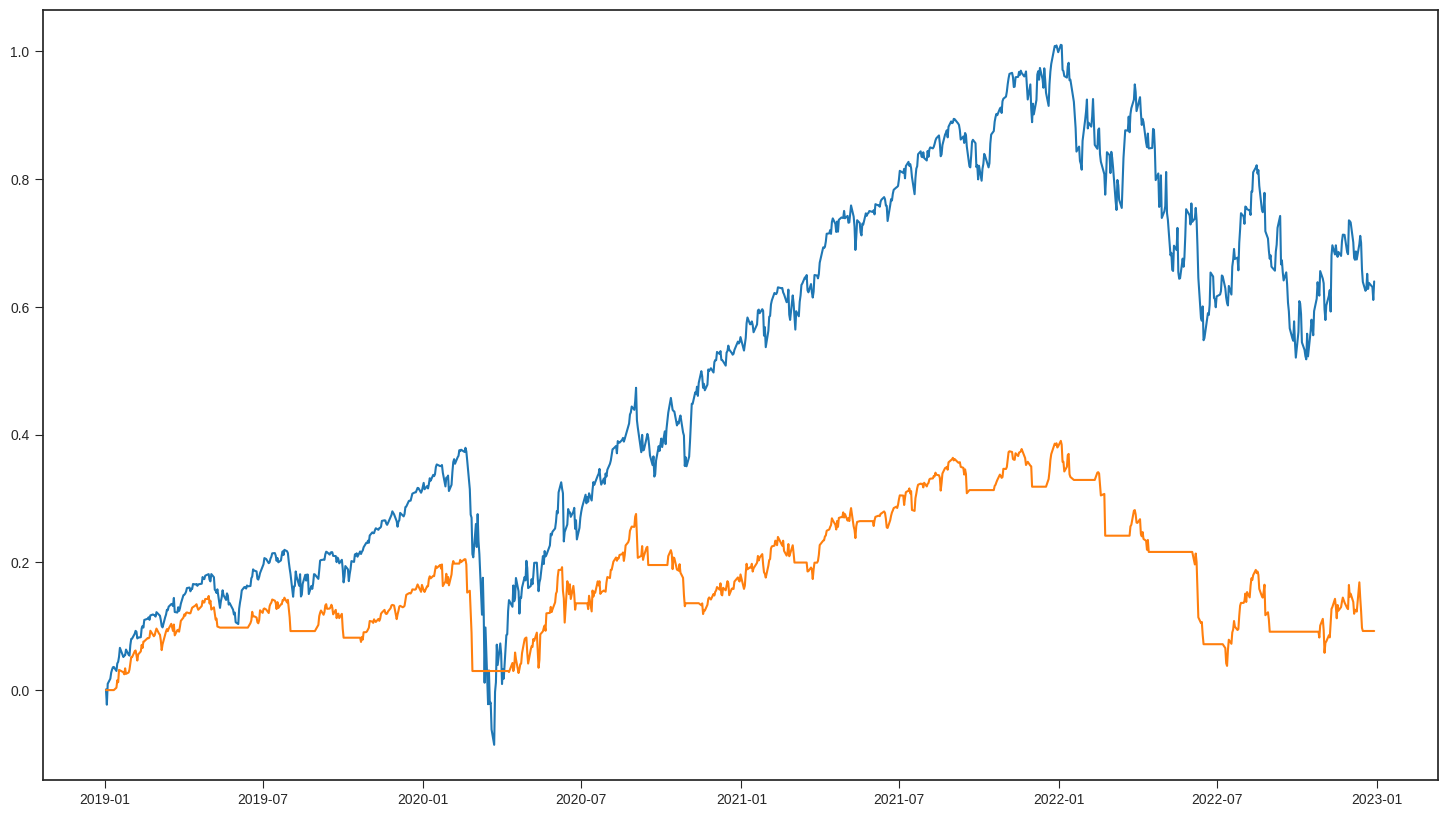

In [70]:
fig = plt.figure(figsize = (18,10))
plt.plot(df_main['bench_prod_exp'])
plt.plot(df_main['strats_prod_exp'])
plt.show()

Check with different hidden_states 0, 1, 2, 3 individually to find which states have better sharpe ratios

In [71]:
df_main.to_csv('data/HMM-SPY.csv')

In [5]:
!pip install kneed
!pip install statsmodels

In [6]:
from kneed import KneeLocator
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.cm as cm
%matplotlib inline

In [7]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
from pandas_datareader.data import DataReader

In [75]:
start_date = '2017-01-1'
end_date = '2022-12-31'
file_name = 'data/raw_data_etf.csv'
file_name_coint = 'data/raw_data_coint_pairs.csv'
load_existing = False
load_coint_pairs = False

In [76]:
if not load_existing:
    symbols_df = get_nasdaq_symbols()
    symbols = symbols_df[(symbols_df['ETF'] == True) & (symbols_df['Market Category'] == 'G')]
    symbols = list(symbols.index.values)
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
    data.to_csv(file_name)

[*********************100%***********************]  544 of 544 completed

ERROR:yfinance:
43 Failed downloads:
ERROR:yfinance:['CAFG', 'RUNN', 'FDFF', 'FBOT', 'LZRD', 'DYTA', 'UFIV', 'IBOT', 'FDTX', 'QYLE', 'NIKL', 'USCL', 'PRVT', 'URNJ', 'VFLO', 'UTRE', 'ICOP', 'BSMW', 'UTHY', 'XBIL', 'FDIF', 'FDCF', 'BDGS', 'PTEC', 'SPAQ', 'FMED', 'BKIV', 'BSVO', 'ILIT', 'COPJ', 'SETM', 'BKWO', 'CLOA', 'ETEC', 'BIGB', 'USVN', 'UTWY', 'UNIY', 'MKAM', 'BIGT', 'LITP', 'MEDX']: Exception("%ticker%: Data doesn't exist for startDate = 1483246800, endDate = 1672462800")
ERROR:yfinance:['IBTO']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [77]:
data = pd.read_csv(file_name)
data.dropna(axis=1, inplace=True)
data = data.set_index('Date')
print('Shape: ', data.shape)
print('Null Values: ', data.isnull().values.any())
data.head()

Shape:  (1510, 261)
Null Values:  False


,AADR,AAXJ,ACWI,ACWX,AGNG,AGZD,AIA,AIRR,ALTY,ANGL,...,VTHR,VTIP,VTWG,VTWO,VTWV,VWOB,VXUS,VYMI,WOOD,XT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00,38.477356,49.435776,52.544998,34.084595,14.575449,38.793945,41.399563,23.478783,9.050780,20.983923,...,93.251930,40.912411,107.183731,50.036007,92.376923,57.906570,38.256920,43.739094,47.666115,25.155083
2017-01-04 00:00:00,39.139629,49.925949,52.994389,34.463402,14.575449,38.882496,41.620758,23.825056,9.178002,21.049282,...,94.323685,40.929062,109.434074,50.786453,93.774567,58.137310,38.679138,44.182594,48.091232,25.482018
2017-01-05 00:00:00,39.559391,50.630005,53.197071,34.758030,14.575449,38.874458,42.133938,23.420576,9.246456,21.100140,...,94.152565,40.978992,108.591393,50.279999,92.510460,58.509457,38.968910,44.610809,48.055805,25.566086
2017-01-06 00:00:00,39.428799,50.380470,53.205883,34.614933,14.575449,38.842247,41.956978,23.420576,9.335510,21.121923,...,94.395721,40.912411,108.035988,50.068226,92.011940,58.345699,38.886120,44.373756,48.055805,25.612787
2017-01-09 00:00:00,39.568718,50.425022,53.082516,34.564423,14.575449,38.745667,42.072002,22.927301,9.275536,21.136456,...,94.071510,40.937382,107.968956,49.732132,90.899178,58.494564,38.811604,44.251415,47.745827,25.675373


In [78]:
df_returns = pd.DataFrame(data.pct_change().mean()*255, columns=['Returns'])
df_returns['Volatility'] = data.pct_change().std()*np.sqrt(255)
df_returns.head()

,Returns,Volatility
AADR,0.063471,0.232682
AAXJ,0.067744,0.214246
ACWI,0.097429,0.189566
ACWX,0.063804,0.187475
AGNG,0.116228,0.189890


In [121]:
scaler = StandardScaler()
scaler = scaler.fit_transform(df_returns)
scaled_data = pd.DataFrame(scaler, columns=df_returns.columns, index=df_returns.index)
df_scaled = scaled_data
df_scaled.head()

,Returns,Volatility
AADR,-0.231288,0.242914
AAXJ,-0.168798,0.057795
ACWI,0.265251,-0.190009
ACWX,-0.226410,-0.211003
AGNG,0.540131,-0.186754


In [122]:
X = df_scaled.copy()
K = range(1, 15)
distortions = []
for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)

k1 = KneeLocator(K, distortions, curve='convex', direction='decreasing')
c = k1.elbow
print('Optimum Clusters: ', c)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimum Clusters:  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [123]:
k_means = KMeans(n_clusters = c)
k_means.fit(X)
prediction = k_means.predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


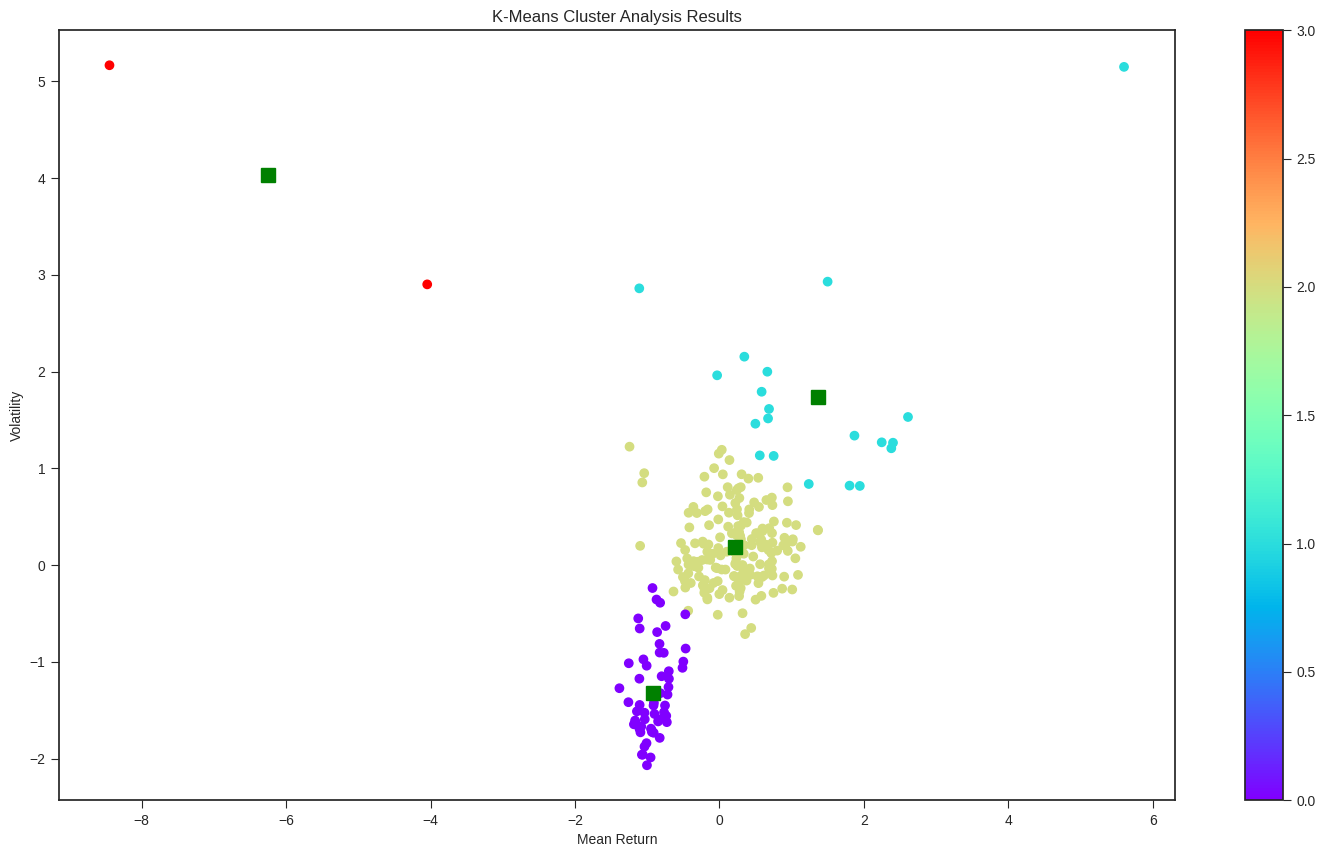

In [124]:
centroids = k_means.cluster_centers_
fig=plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_means.labels_, cmap='rainbow', label=X.index)
ax.set_title('K-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:, 0], centroids[:, 1], 'sg', markersize=10)
plt.show()

In [126]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
clustered_series.value_counts()

2    181
0     58
1     20
3      2
dtype: int64

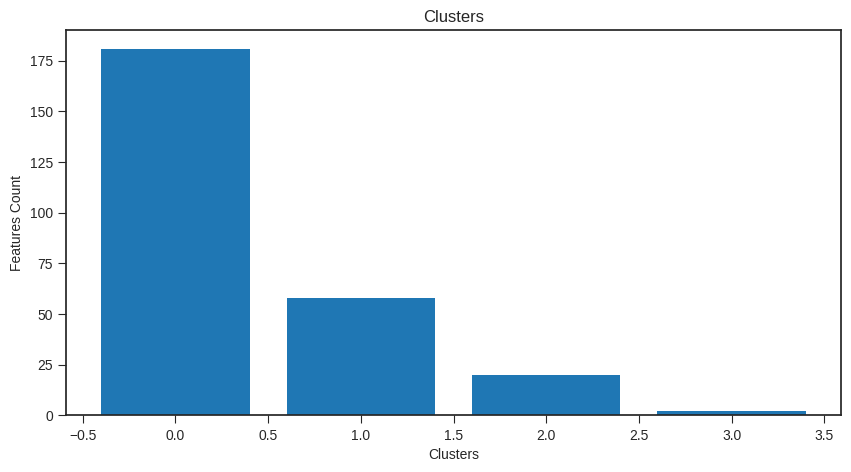

In [127]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Clusters')
plt.ylabel('Features Count')
plt.show()

In [131]:
clusters_clean = clustered_series[clustered_series < 3]
print('Feature Number Previous: ', len(clustered_series))
print('Feature Number Current: ', len(clusters_clean))

Feature Number Previous:  261
Feature Number Current:  259


In [139]:
def calculate_cointegration(series1, series2):
  coint_flag = 0
  coint_res = coint(series1, series2)
  coint_t = coint_res[0]
  p_value = coint_res[1]
  critical_value = coint_res[2][1]
  model = sm.OLS(series1, series2).fit()
  hedge_ratio = model.params[0]
  coint_flag = 1 if p_value < 0.05 and coint_t < critical_value else 0
  return coint_flag, hedge_ratio

In [140]:
tested_pairs = []
cointegrated_pairs = []

if not load_coint_pairs:
    for base_asset in clusters_clean.index:
        base_label = clusters_clean[base_asset]
        for compare_asset in clusters_clean.index:
            compare_label = clusters_clean[compare_asset]
            test_pair = base_asset + compare_asset
            test_pair = ''.join(sorted(test_pair))
            is_tested = test_pair in tested_pairs
            tested_pairs.append(test_pair)
            if compare_asset != base_asset and base_label == compare_label and not is_tested:
                series1 = data[base_asset].values.astype(float)
                series2 = data[compare_asset].values.astype(float)
                coint_flag, _ = calculate_cointegration(series1, series2)
                if coint_flag == 1:
                    cointegrated_pairs.append({'base_asset': base_asset, 'compare_asset': compare_asset, 'label': base_label})

    df_coint = pd.DataFrame(cointegrated_pairs).sort_values(by='label')
    df_coint.to_csv(file_name_coint)


In [141]:
df_coint = pd.read_csv(file_name_coint).iloc[:, 1:]
df_coint.head()

,base_asset,compare_asset,label
0,EMCB,VGSH,0
1,PFF,VGSH,0
2,ANGL,FALN,0
3,EMB,GNMA,0
4,EMB,PLW,0


In [142]:
df_coint.label.value_counts()

2    536
0     42
1     33
Name: label, dtype: int64

In [144]:
coint_assets = [df_coint['base_asset'].values]
coint_assets.append(df_coint['compare_asset'].values)
coint_unique_assets = np.unique(coint_assets)
coint_unique_assets[:5]

array(['AADR', 'AAXJ', 'ACWI', 'ACWX', 'AGNG'], dtype=object)

In [145]:
df_TSNE = df_scaled.copy()
df_TSNE = df_TSNE[df_TSNE.index.isin(coint_unique_assets)]
df_TSNE.head()

,Returns,Volatility
AADR,-0.231288,0.242914
AAXJ,-0.168798,0.057795
ACWI,0.265251,-0.190009
ACWX,-0.226410,-0.211003
AGNG,0.540131,-0.186754


In [146]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(df_TSNE)
X_tsne[:5]

array([[-24.286709 , -12.564039 ],
       [-29.815277 ,  -9.3508   ],
       [-24.608034 ,  24.593872 ],
       [-46.45241  ,  -0.5742004],
       [-13.39615  ,  34.01977  ]], dtype=float32)

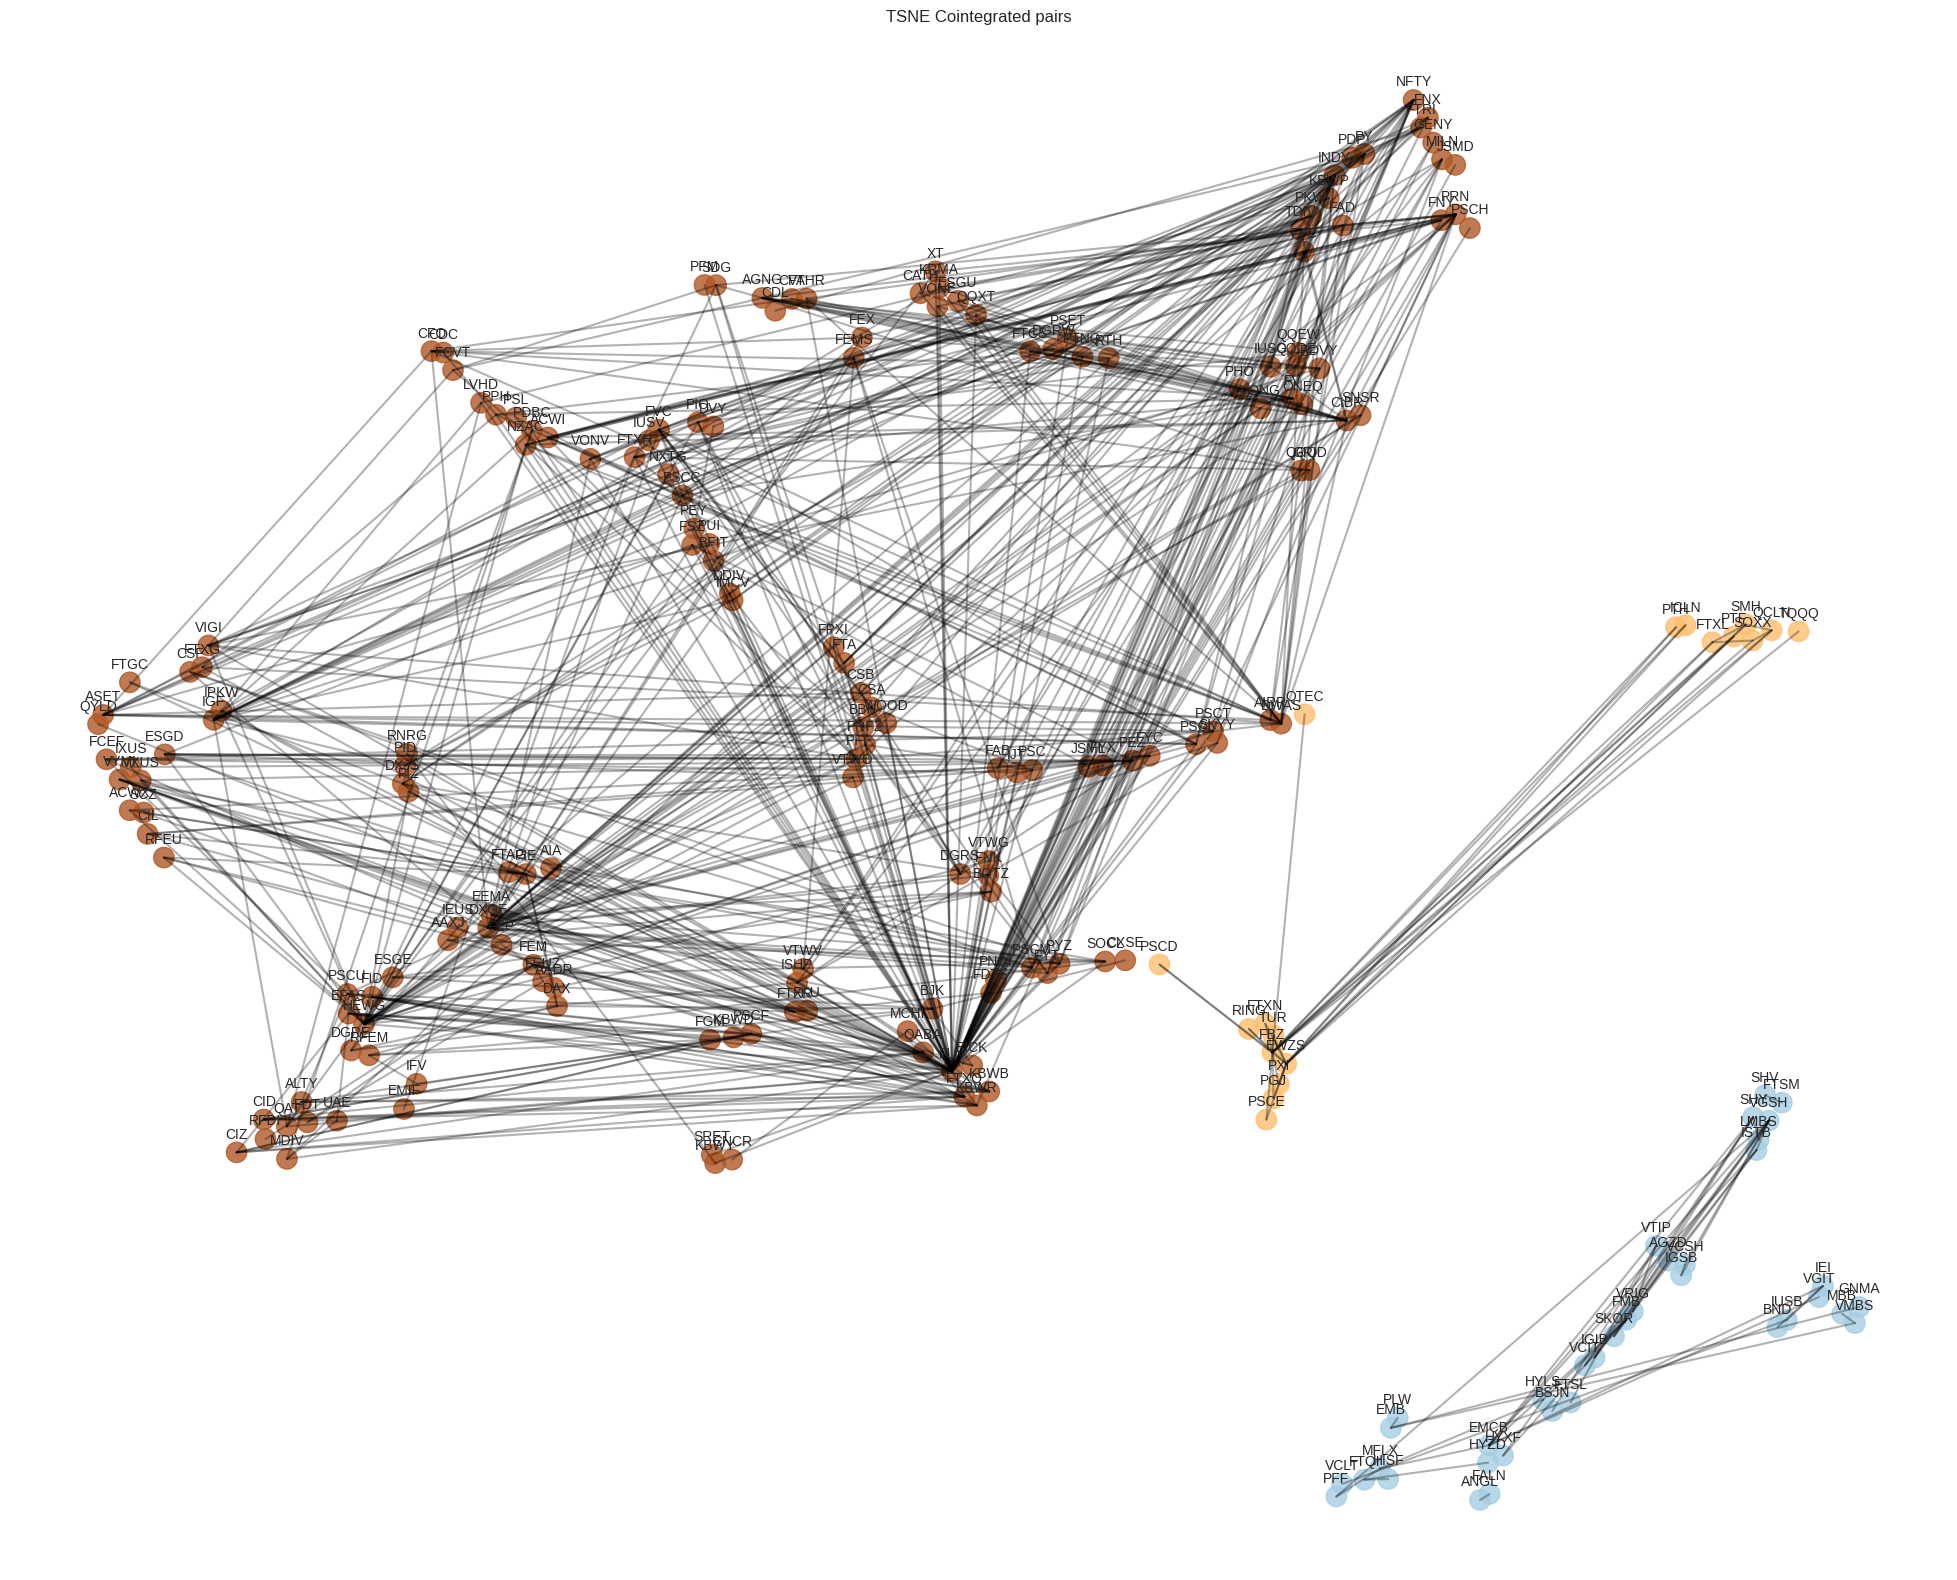

In [154]:
from os import name
in_pairs_series = clustered_series.loc[coint_unique_assets]
plt.figure(1, figsize=(25,20))
plt.clf()
plt.axis('off')
for index, pair in df_coint.iterrows():
  ticker1 = pair[0]
  loc1 = df_TSNE.index.get_loc(pair[0])
  x1, y1 = X_tsne[loc1, :]
  ticker2 = pair[0]
  loc2 = df_TSNE.index.get_loc(pair[1])
  x2, y2 = X_tsne[loc2, :]
  plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)
plt.scatter(X_tsne[:, 0], X_tsne[:,1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Cointegrated pairs')

for x,y, name in zip(X_tsne[:, 0], X_tsne[:, 1], df_TSNE.index):
  label = name
  plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center')
plt.show()

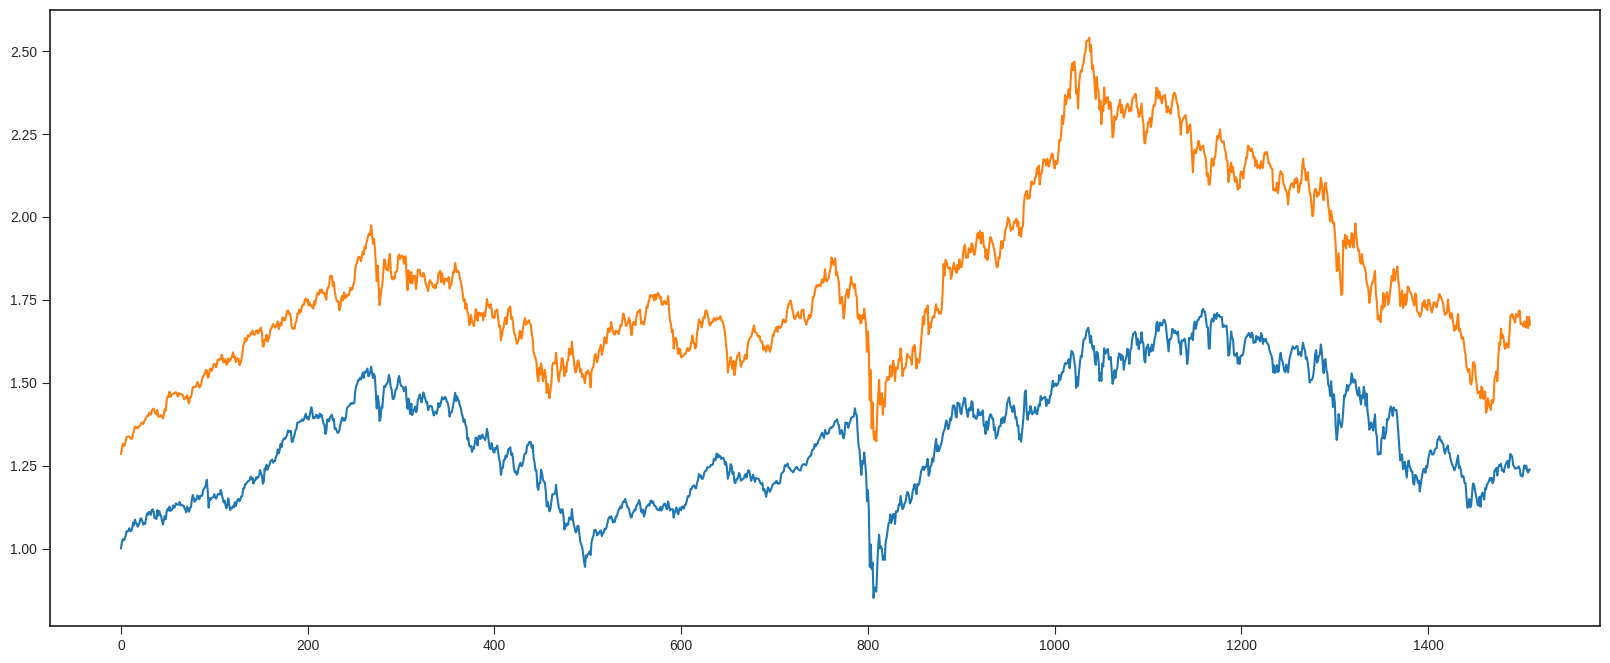

In [156]:
asset_1 = 'AADR'
asset_2 = 'AAXJ'
asset_1_values = data[asset_1].values/data[asset_1].iloc[0].item()
asset_2_values = data[asset_2].values/data[asset_1].iloc[0].item()
plt.figure(1, figsize=(20, 8))
plt.plot(asset_1_values)
plt.plot(asset_2_values)
plt.show()

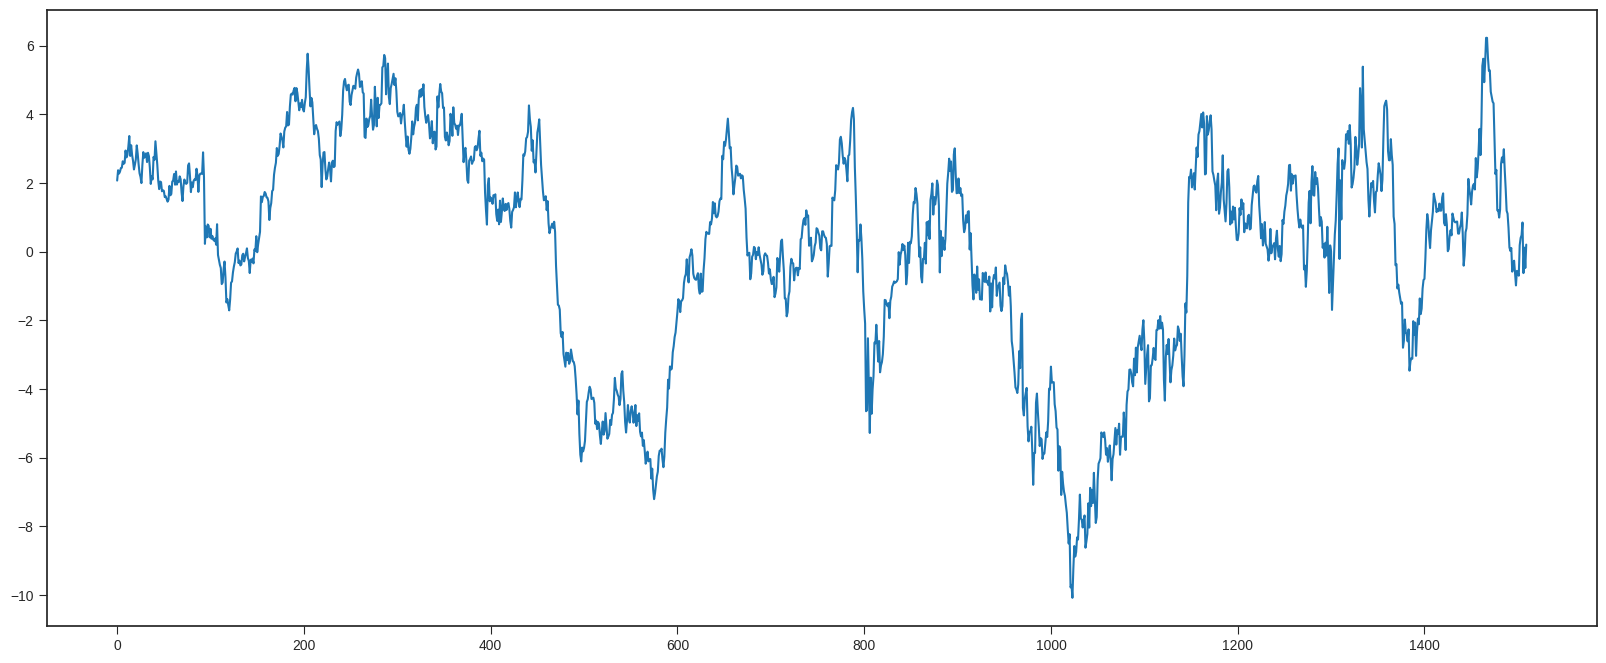

In [157]:
series1 = data[asset_1].values.astype(float)
series2 = data[asset_2].values.astype(float)
coint_flag, hedge_ratio = calculate_cointegration(series1, series2)
spread = series1-(hedge_ratio*series2)
plt.figure(1, figsize=(20,8))
plt.plot(spread)
plt.show()

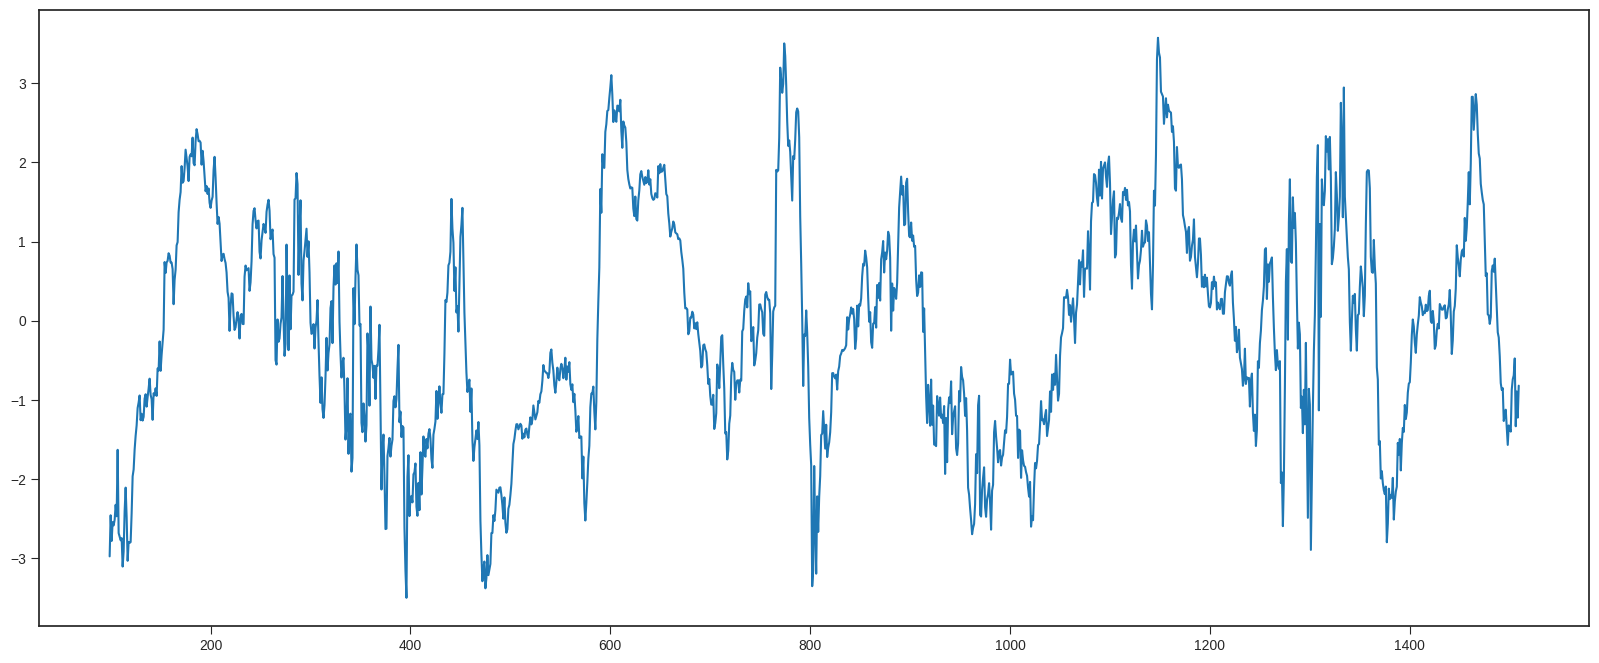

In [159]:
window = 100
spread_series = pd.Series(spread)
mean = spread_series.rolling(center=False, window=window).mean()
std = spread_series.rolling(center=False, window=window).std()
x = spread_series.rolling(center=False, window=1).mean()
z_score = (x - mean)/std
plt.figure(1, figsize=(20,8))
plt.plot(z_score)
plt.show()

In [8]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score

In [10]:
df = yf.download('^VIX', start='2017-01-15', end='2022-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-17,12.20,12.75,11.79,11.87,11.87,0
2017-01-18,11.79,12.81,11.69,12.48,12.48,0
2017-01-19,12.58,13.28,12.17,12.78,12.78,0
2017-01-20,12.58,12.59,11.53,11.54,11.54,0
2017-01-23,12.30,12.62,11.59,11.77,11.77,0


In [181]:
df = add_all_ta_features(df, open='Open', high='High', low='Low', close='Adj Close', volume='Volume', fillna=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-17,12.20,12.75,11.79,11.87,11.87,0,-0.0,0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.870000,-39.642317,0.000000,0.000000
2017-01-18,11.79,12.81,11.69,12.48,12.48,0,0.0,0,0.0,0.0,...,0.408394,0.081679,0.326715,0.0,0.0,0.0,12.119450,5.139003,5.011313,5.139003
2017-01-19,12.58,13.28,12.17,12.78,12.78,0,0.0,0,0.0,0.0,...,0.919613,0.249266,0.670347,0.0,0.0,0.0,12.321933,2.403848,2.375410,7.666385
2017-01-20,12.58,12.59,11.53,11.54,11.54,0,0.0,0,0.0,0.0,...,0.486955,0.296804,0.190151,0.0,0.0,0.0,12.130854,-9.702659,-10.206217,-2.780117
2017-01-23,12.30,12.62,11.59,11.77,11.77,0,0.0,0,0.0,0.0,...,0.294367,0.296316,-0.001949,0.0,0.0,0.0,12.014114,1.993072,1.973470,-0.842455


In [182]:
df.shape

(1501, 92)

In [183]:
non_stationaries = []
for col in df.columns:
  dftest = adfuller(df[col].values)
  p_value = dftest[1]
  t_test = dftest[0] < dftest[4]['1%']
  if p_value > 0.05 or not t_test:
    non_stationaries.append(col)
print(f'Non-Stationary Features Found: {len(non_stationaries)}')

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Non-Stationary Features Found: 24


In [213]:
df_stationary = df.copy()
df_stationary[non_stationaries] = df_stationary[non_stationaries].pct_change()
df_stationary = df_stationary.iloc[1:]
df_stationary.head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-18,11.79,12.81,11.69,12.48,12.48,NaN,NaN,NaN,NaN,NaN,...,0.408394,0.081679,0.326715,NaN,NaN,NaN,0.021015,5.139003,5.011313,5.139003
2017-01-19,12.58,13.28,12.17,12.78,12.78,NaN,NaN,NaN,NaN,NaN,...,0.919613,0.249266,0.670347,NaN,NaN,NaN,0.016707,2.403848,2.375410,7.666385
2017-01-20,12.58,12.59,11.53,11.54,11.54,NaN,NaN,NaN,NaN,NaN,...,0.486955,0.296804,0.190151,NaN,NaN,NaN,-0.015507,-9.702659,-10.206217,-2.780117
2017-01-23,12.30,12.62,11.59,11.77,11.77,NaN,NaN,NaN,NaN,NaN,...,0.294367,0.296316,-0.001949,NaN,NaN,NaN,-0.009623,1.993072,1.973470,-0.842455
2017-01-24,11.82,11.89,11.04,11.07,11.07,NaN,NaN,NaN,NaN,NaN,...,-0.329988,0.171055,-0.501044,NaN,NaN,NaN,-0.021468,-5.947330,-6.131524,-6.739682


In [214]:
na_list = df_stationary.columns[df_stationary.isna().any().tolist()]
df_stationary.drop(columns=na_list, inplace=True)

In [215]:
df_stationary.replace([np.inf, -np.inf], 0, inplace=True)
df_stationary.head()

,Open,High,Low,Close,Adj Close,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-18,11.79,12.81,11.69,12.48,12.48,0.0,0.0,12.175000,12.784999,-0.025695,...,-29.464342,0.000000,0.0,0.408394,0.081679,0.326715,0.021015,5.139003,5.011313,5.139003
2017-01-19,12.58,13.28,12.17,12.78,12.78,0.0,0.0,12.376666,13.133913,0.004706,...,-31.446538,0.000000,0.0,0.919613,0.249266,0.670347,0.016707,2.403848,2.375410,7.666385
2017-01-20,12.58,12.59,11.53,11.54,11.54,0.0,0.0,12.167500,13.144779,-0.036938,...,-99.428558,0.000000,0.0,0.486955,0.296804,0.190151,-0.015507,-9.702659,-10.206217,-2.780117
2017-01-23,12.30,12.62,11.59,11.77,11.77,0.0,0.0,12.088000,13.018152,-0.002893,...,-86.285673,0.000000,0.0,0.294367,0.296316,-0.001949,-0.009623,1.993072,1.973470,-0.842455
2017-01-24,11.82,11.89,11.04,11.07,11.07,0.0,0.0,11.918333,13.057070,-0.033900,...,-98.660726,-0.024833,0.0,-0.329988,0.171055,-0.501044,-0.021468,-5.947330,-6.131524,-6.739682


In [216]:
df_stationary['Target'] = -1
df_stationary.loc[df_stationary['Adj Close'].shift(1) > df_stationary['Adj Close'], 'Target'] = 1
df_stationary.head()

,Open,High,Low,Close,Adj Close,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,...,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_kama,others_dr,others_dlr,others_cr,Target
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-18,11.79,12.81,11.69,12.48,12.48,0.0,0.0,12.175000,12.784999,-0.025695,...,0.000000,0.0,0.408394,0.081679,0.326715,0.021015,5.139003,5.011313,5.139003,-1
2017-01-19,12.58,13.28,12.17,12.78,12.78,0.0,0.0,12.376666,13.133913,0.004706,...,0.000000,0.0,0.919613,0.249266,0.670347,0.016707,2.403848,2.375410,7.666385,-1
2017-01-20,12.58,12.59,11.53,11.54,11.54,0.0,0.0,12.167500,13.144779,-0.036938,...,0.000000,0.0,0.486955,0.296804,0.190151,-0.015507,-9.702659,-10.206217,-2.780117,1
2017-01-23,12.30,12.62,11.59,11.77,11.77,0.0,0.0,12.088000,13.018152,-0.002893,...,0.000000,0.0,0.294367,0.296316,-0.001949,-0.009623,1.993072,1.973470,-0.842455,-1
2017-01-24,11.82,11.89,11.04,11.07,11.07,0.0,0.0,11.918333,13.057070,-0.033900,...,-0.024833,0.0,-0.329988,0.171055,-0.501044,-0.021468,-5.947330,-6.131524,-6.739682,1


In [217]:
df_stationary.dropna(inplace=True)

In [218]:
X = df_stationary.iloc[:, :-1]
y = df_stationary.iloc[:, -1]
X.head()

,Open,High,Low,Close,Adj Close,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-18,11.79,12.81,11.69,12.48,12.48,0.0,0.0,12.175000,12.784999,-0.025695,...,-29.464342,0.000000,0.0,0.408394,0.081679,0.326715,0.021015,5.139003,5.011313,5.139003
2017-01-19,12.58,13.28,12.17,12.78,12.78,0.0,0.0,12.376666,13.133913,0.004706,...,-31.446538,0.000000,0.0,0.919613,0.249266,0.670347,0.016707,2.403848,2.375410,7.666385
2017-01-20,12.58,12.59,11.53,11.54,11.54,0.0,0.0,12.167500,13.144779,-0.036938,...,-99.428558,0.000000,0.0,0.486955,0.296804,0.190151,-0.015507,-9.702659,-10.206217,-2.780117
2017-01-23,12.30,12.62,11.59,11.77,11.77,0.0,0.0,12.088000,13.018152,-0.002893,...,-86.285673,0.000000,0.0,0.294367,0.296316,-0.001949,-0.009623,1.993072,1.973470,-0.842455
2017-01-24,11.82,11.89,11.04,11.07,11.07,0.0,0.0,11.918333,13.057070,-0.033900,...,-98.660726,-0.024833,0.0,-0.329988,0.171055,-0.501044,-0.021468,-5.947330,-6.131524,-6.739682


In [219]:
df_sc = df_stationary.copy()
X_fs = StandardScaler().fit_transform(X)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.2, random_state=42)

In [223]:
pca = PCA(n_components=8)
pca_result = pca.fit(X_train)
X_train_pca = pca_result.transform(X_train)
X_test_pca = pca_result.transform(X_test)

In [224]:
print('Variance of each component: ', pca.explained_variance_ratio_)
print('\n Total Variance Explained: ', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component:  [0.33772873 0.22960639 0.0910282  0.04711768 0.03371818 0.02908807
 0.02114286 0.01827956]

 Total Variance Explained:  80.77


In [227]:
pca_cols = []
for i in range(8):
  pca_cols.append(f'PC_{i}')
pca_cols

['PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7']

In [228]:
df_pca = pd.DataFrame(data=X_train_pca, columns=pca_cols)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-4.323371,-1.128081,1.147882,1.254412,1.024222,-0.448467,-1.046900,0.103528
1,-2.065704,-2.547214,-0.154645,-2.958650,0.847829,0.010720,2.162738,0.090389
2,-2.137282,1.296376,-0.548878,-2.168762,0.106252,1.245564,2.112080,-0.882950
3,2.978948,-4.694358,-4.845077,0.899045,-1.048525,-2.333191,-1.301766,-1.322245
4,-3.645175,0.014918,-0.567693,0.652080,1.085339,-0.708962,-1.072994,0.485097


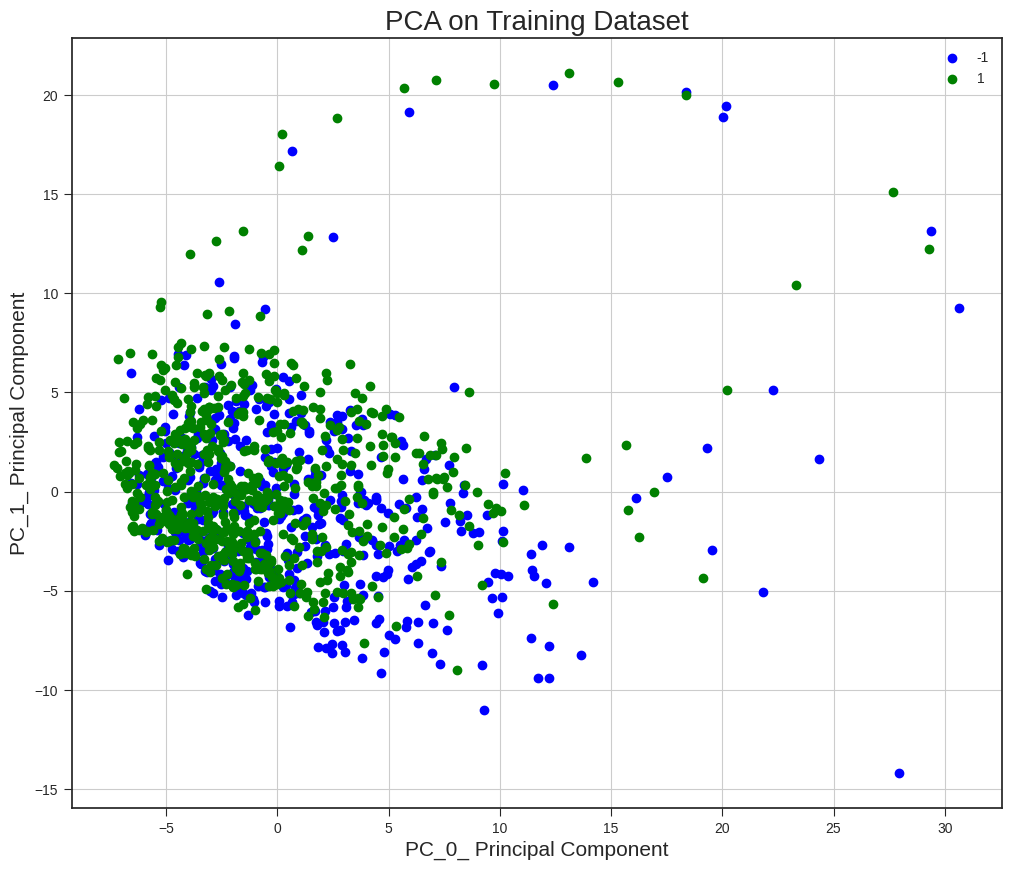

In [234]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
col_1 = 'PC_0'
col_2 = 'PC_1'
ax.set_xlabel(f'{col_1}_ Principal Component', fontsize=15)
ax.set_ylabel(f'{col_2}_ Principal Component', fontsize=15)
ax.set_title('PCA on Training Dataset', fontsize=20)

targets= [-1, 1]
colors = ['b', 'g']
for target, color in zip(targets, colors):
  indices_to_keep = y_train == target
  indices_to_keep = list(indices_to_keep)
  ax.scatter(df_pca.loc[indices_to_keep, col_1],
             df_pca.loc[indices_to_keep, col_2],
             c=color)
ax.legend(targets)
ax.grid()


In [238]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=12, max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'Accuracy Test: {accuracy}')
print(f'Precision Test: {precision}')

Accuracy Test: 1.0
Precision Test: 1.0


In [248]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

array([[0.25741725, 0.74258275],
       [0.24576851, 0.75423149],
       [0.63298819, 0.36701181],
       [0.81174803, 0.18825197],
       [0.30075524, 0.69924476],
       [0.65569478, 0.34430522],
       [0.16621445, 0.83378555],
       [0.6296169 , 0.3703831 ],
       [0.27959384, 0.72040616],
       [0.88019959, 0.11980041],
       [0.13439862, 0.86560138],
       [0.85992932, 0.14007068],
       [0.67634309, 0.32365691],
       [0.08392474, 0.91607526],
       [0.63847506, 0.36152494],
       [0.24576851, 0.75423149],
       [0.24576851, 0.75423149],
       [0.24617649, 0.75382351],
       [0.75143501, 0.24856499],
       [0.6507783 , 0.3492217 ],
       [0.06174815, 0.93825185],
       [0.61292718, 0.38707282],
       [0.24617649, 0.75382351],
       [0.08392474, 0.91607526],
       [0.30120005, 0.69879995],
       [0.74893865, 0.25106135],
       [0.63408857, 0.36591143],
       [0.27959384, 0.72040616],
       [0.24617649, 0.75382351],
       [0.65569478, 0.34430522],
       [0.

In [249]:
# Test for Overfitting
train_scores, test_scores = list(), list()
values = [i for i in range(1, 200)]
for i in values:
    classifier = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    classifier.fit(X_train, y_train)

    # Training Data
    y_train_pred = classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    train_scores.append(accuracy_train)

    # Test Data
    y_test_pred = classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    test_scores.append(accuracy_test)

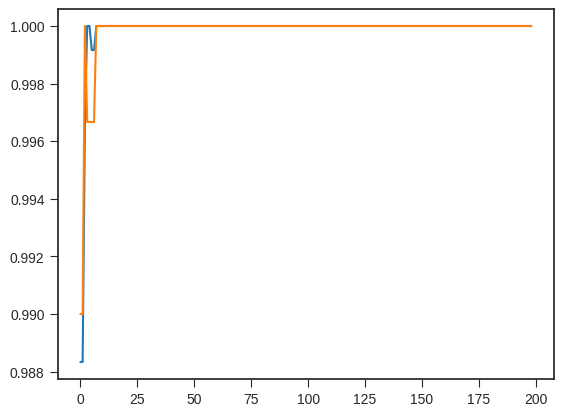

In [250]:
# Plot Results
plt.plot(train_scores)
plt.plot(test_scores)
plt.show()

In [9]:
import sklearn.mixture as mix
from ta.momentum import RSIIndicator
import matplotlib.pyplot as plt

In [10]:
pip install --upgrade yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.21
    Uninstalling yfinance-0.2.21:
      Successfully uninstalled yfinance-0.2.21


In [11]:
import yfinance as yf

In [14]:
!pip install pandas_datareader

In [15]:
import numpy as np
import yfinance as yf

# Create the class
class StrategyManager():

    # Initialize the class
    def __init__(self, symbol, start_date, end_date):
        self.df = self._extract_data(symbol, start_date, end_date)
        self.sharpe = 0

    # Extract data
    def _extract_data(self, symbol, start_date, end_date):
        data = yf.download(symbol, start=start_date, end=end_date)
        data = data[["Open", "High", "Low", "Close", "Volume"]]
        data = self._structure_df(data)
        return data

    # Calculates general period returns and volatility
    def _structure_df(self, df):
        df["Returns"] = df["Close"].pct_change()
        df["Range"] = df["High"] / df["Low"] - 1
        df["Bench_C_Rets"], sharpe = self._calculate_returns(df, True)
        self.sharpe = sharpe
        df.dropna(inplace=True)
        return df

    # Adjusts the signal to represent our strategy
    def _set_multiplier(self, direction):
        if direction == "long":
            pos_multiplier = 1
            neg_multiplier = 0
        elif direction == "long_short":
            pos_multiplier = 1
            neg_multiplier = -1
        else:
            pos_multiplier = 0
            neg_multiplier = -1
        return pos_multiplier, neg_multiplier

    # Calculates returns for equity curve
    def _calculate_returns(self, df, is_benchmark):

        # Calculate multiplier
        if not is_benchmark:
            multiplier_1 = df["Signal"]
            multiplier_2 = 1 if "PSignal" not in df.columns else df["PSignal"]
            log_rets = np.log(df["Close"] / df["Close"].shift(1)) * multiplier_1 * multiplier_2
        else:
            multiplier_1 = 1
            multiplier_2 = 1

            # Assume open price on following day to avoid lookahead bias for close calculation
            log_rets = np.log(df["Open"].shift(-1) / df["Close"].shift(1)) * multiplier_1 * multiplier_2

        # Calculate Sharpe Ratio
        sharpe_ratio = self.sharpe_ratio(log_rets)

        # Calculate Cumulative Returns
        c_log_rets = log_rets.cumsum()
        c_log_rets_exp = np.exp(c_log_rets) - 1

        # Return result and Sharpe ratio
        return c_log_rets_exp, sharpe_ratio

    def sharpe_ratio(self, return_series):
        N = 255 # Trading days in the year (change to 365 for crypto)
        rf = 0.005 # Half a percent risk free rare
        mean = return_series.mean() * N -rf
        sigma = return_series.std() * np.sqrt(N)
        sharpe = round(mean / sigma, 3)
        return sharpe

    # Replace Dataframe
    def change_df(self, new_df, drop_cols=[]):
        new_df = new_df.drop(columns=drop_cols)
        self.df = new_df

    # Moving average crossover strategy
    def backtest_ma_crossover(self, period_1, period_2, direction, drop_cols=[]):

        # Set df
        df = self.df

        # Get multipliers
        pos_multiplier, neg_multiplier = self._set_multiplier(direction)

        # Calculate Moving Averages
        if f"MA_{period_1}" or f"MA_{period_2}" not in df.columns:
            df[f"MA_{period_1}"] = df["Close"].rolling(window=period_1).mean()
            df[f"MA_{period_2}"] = df["Close"].rolling(window=period_2).mean()
            df.dropna(inplace=True)

        # Calculate Benchmark Returns
        df["Bench_C_Rets"], sharpe_ratio_bench = self._calculate_returns(df, True)

        # Calculate Signal
        df.loc[df[f"MA_{period_1}"] > df[f"MA_{period_2}"], "Signal"] = pos_multiplier
        df.loc[df[f"MA_{period_1}"] <= df[f"MA_{period_2}"], "Signal"] = neg_multiplier

        # Calculate Strategy Returns
        df["Strat_C_Rets"], sharpe_ratio_strat = self._calculate_returns(df, False)

        # Get values for output
        bench_rets = df["Bench_C_Rets"].values.astype(float)
        strat_rets = df["Strat_C_Rets"].values.astype(float)
        print("Sense check: ", round(df["Close"].values[-1] / df["Close"].values[0] - 1, 3), round(bench_rets[-1], 3))

        # Remove irrelevant features
        if len(drop_cols) > 0:
            df = df.drop(columns=drop_cols)

        # Ensure Latest DF matches
        df = df.dropna()
        self.df = df

        # Return df
        return df, sharpe_ratio_bench, sharpe_ratio_strat

In [16]:
# Extract Data
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "BTC-USD"
strat_mgr = StrategyManager(symbol, start_date, end_date)
df = strat_mgr.df.copy()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets
Date,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803,0.023314
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005,0.045999
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130,0.159122
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302,0.018098
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249,-0.092307


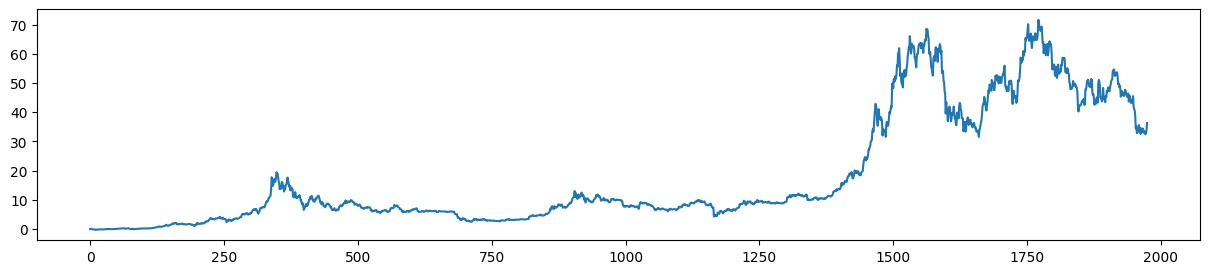

In [17]:
fig = plt.figure(figsize=(15,3))
plt.plot(df['Bench_C_Rets'].values)
plt.show()

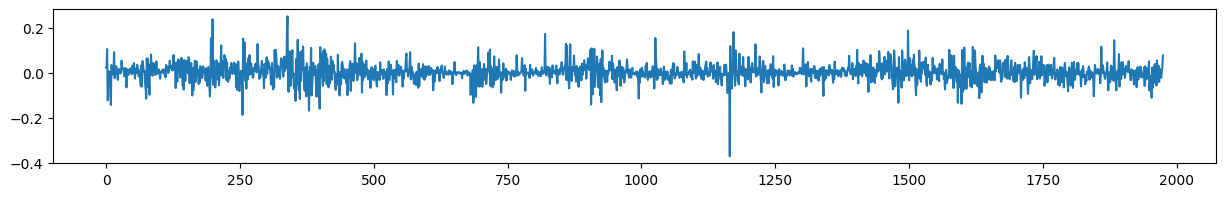

In [18]:
fig = plt.figure(figsize=(15,2))
plt.plot(df['Returns'].values)
plt.show()

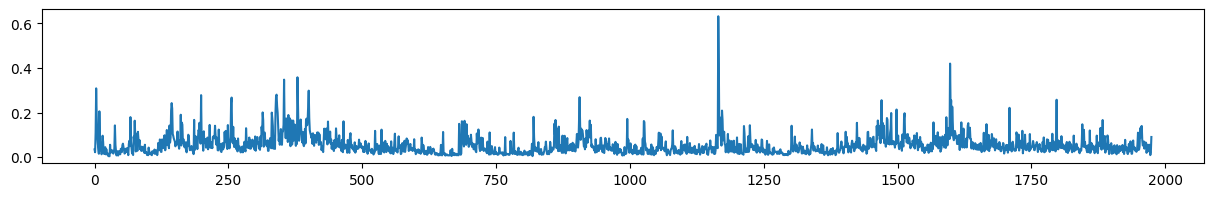

In [19]:
fig = plt.figure(figsize=(15,2))
plt.plot(df['Range'].values)
plt.show()

In [20]:
df_fe = df.copy()

In [21]:
rsi = RSIIndicator(close=df_fe['Close'], window=14).rsi()
df_fe['RSI'] = rsi
df_fe['RSI_Ret'] = df_fe['RSI']/df_fe['RSI'].shift(1)

In [22]:
df_fe['MA_12'] = df_fe['Close'].rolling(window=12).mean()
df_fe['MA_21'] = df_fe['Close'].rolling(window=21).mean()

In [23]:
df_fe['DOW'] = df_fe.index.day_of_week

In [24]:
df_fe['Roll_Rets'] = df_fe['Returns'].rolling(window=30).sum()

In [25]:
df_fe['Avg_Range'] = df_fe['Range'].rolling(window=30).mean()

In [113]:
t_steps = [1,2]
t_features = ['Returns', 'Range', 'RSI_Ret']
for ts in t_steps:
  for tf in t_features:
    df_fe[f'{tf}_T{ts}'] = df_fe[tf].shift(ts)

In [114]:
df_fe.head()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803,0.023314,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005,0.045999,NaN,NaN,...,NaN,1,NaN,NaN,0.023464,0.034803,NaN,NaN,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130,0.159122,NaN,NaN,...,NaN,2,NaN,NaN,0.021620,0.022005,NaN,0.023464,0.034803,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302,0.018098,NaN,NaN,...,NaN,3,NaN,NaN,0.106233,0.110130,NaN,0.021620,0.022005,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249,-0.092307,NaN,NaN,...,NaN,4,NaN,NaN,-0.122410,0.308302,NaN,0.106233,0.110130,NaN


In [115]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1975 entries, 2017-01-02 to 2022-05-30
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1975 non-null   float64
 1   High          1975 non-null   float64
 2   Low           1975 non-null   float64
 3   Close         1975 non-null   float64
 4   Volume        1975 non-null   int64  
 5   Returns       1975 non-null   float64
 6   Range         1975 non-null   float64
 7   Bench_C_Rets  1975 non-null   float64
 8   RSI           1962 non-null   float64
 9   RSI_Ret       1961 non-null   float64
 10  MA_12         1964 non-null   float64
 11  MA_21         1955 non-null   float64
 12  DOW           1975 non-null   int64  
 13  Roll_Rets     1946 non-null   float64
 14  Avg_Range     1946 non-null   float64
 15  Returns_T1    1974 non-null   float64
 16  Range_T1      1974 non-null   float64
 17  RSI_Ret_T1    1960 non-null   float64
 18  Returns_T2

In [116]:
df_fe.describe()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
count,1975.000000,1975.000000,1975.000000,1975.000000,1.975000e+03,1975.000000,1975.000000,1975.000000,1962.000000,1961.000000,...,1955.000000,1975.000000,1946.000000,1946.000000,1974.000000,1974.000000,1960.000000,1973.000000,1973.000000,1959.000000
mean,17312.616292,17767.888985,16807.937137,17325.805974,2.167915e+10,0.002620,0.054668,18.086152,53.297658,1.005459,...,17346.499759,2.998481,0.080488,0.054496,0.002582,0.054650,1.005333,0.002572,0.054666,1.005290
std,17574.524974,18027.980048,17047.352674,17569.228707,2.066772e+10,0.041486,0.045895,19.580538,14.498607,0.104726,...,17503.591527,2.001139,0.252338,0.024850,0.041463,0.045899,0.104603,0.041471,0.045905,0.104612
min,775.177979,823.307007,755.755981,777.757019,6.085170e+07,-0.371695,0.003887,-0.218666,9.920239,0.453659,...,879.940712,0.000000,-0.844981,0.015818,-0.371695,0.003887,0.453659,-0.371695,0.003887,0.453659
25%,6168.125000,6309.529785,5926.454590,6173.879395,4.935645e+09,-0.015825,0.026197,5.711019,43.068950,0.954055,...,6406.828788,1.000000,-0.079972,0.036458,-0.015838,0.026188,0.954054,-0.015851,0.026213,0.954053
50%,9145.985352,9299.621094,8956.429688,9159.040039,1.800070e+10,0.002314,0.042816,8.858000,52.352478,1.006182,...,9209.542550,3.000000,0.052905,0.049081,0.002304,0.042801,1.006166,0.002294,0.042816,1.006151
75%,30367.798828,31910.902344,29289.377930,30429.202148,3.273176e+10,0.021142,0.067157,33.493895,63.140720,1.047798,...,32868.075800,5.000000,0.248645,0.067115,0.021105,0.067144,1.047635,0.021076,0.067154,1.047361
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.252472,0.631387,71.644966,94.302215,1.926078,...,63016.876488,6.000000,1.154731,0.138628,0.252472,0.631387,1.926078,0.252472,0.631387,1.926078


In [117]:
df_fe.to_csv(f'data/{symbol}.csv')

In [118]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [119]:
df=pd.read_csv('data/BTC-USD.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803,0.023314,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005,0.045999,NaN,NaN,...,NaN,1,NaN,NaN,0.023464,0.034803,NaN,NaN,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130,0.159122,NaN,NaN,...,NaN,2,NaN,NaN,0.021620,0.022005,NaN,0.023464,0.034803,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302,0.018098,NaN,NaN,...,NaN,3,NaN,NaN,0.106233,0.110130,NaN,0.021620,0.022005,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249,-0.092307,NaN,NaN,...,NaN,4,NaN,NaN,-0.122410,0.308302,NaN,0.106233,0.110130,NaN


In [120]:
df.loc[df['Range'].shift(-1) > df['Avg_Range'], 'TARGET'] = 1
df.loc[df['Range'].shift(-1) <= df['Avg_Range'], 'TARGET'] = 0

In [121]:
nan_location = np.where(np.isnan(df))
nan_location

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    2,    2,    2,    2,    2,    2,    2,    2,    2,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    4,    4,
           4,    4,    4,    4,    4,    4,    4,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    6,    6,    6,    6,    6,    6,
           6,    6,    6,    7,    7,    7,    7,    7,    7,    7,    7,
           7,    8,    8,    8,    8,    8,    8,    8,    8,    8,    9,
           9,    9,    9,    9,    9,    9,    9,    9,   10,   10,   10,
          10,   10,   10,   10,   10,   10,   11,   11,   11,   11,   11,
          11,   11,   11,   12,   12,   12,   12,   12,   12,   12,   12,
          13,   13,   13,   13,   13,   13,   13,   14,   14,   14,   14,
          14,   14,   15,   15,   15,   15,   15,   16,   16,   16,   16,
          17,   17,   17,   17,   18, 

In [122]:
df['TARGET'].fillna(0, inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2,TARGET
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,-0.009984,0.055632,33.189608,38.165993,0.977232,...,3,-0.239867,0.057147,-0.003144,0.026300,0.993166,0.019130,0.034313,1.065192,0.0
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,-0.021856,0.036020,32.436595,36.240181,0.949541,...,4,-0.291202,0.057119,-0.009984,0.055632,0.977232,-0.003144,0.026300,0.993166,0.0
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,35519577634,0.006544,0.009117,32.894788,37.238957,1.027560,...,5,-0.298233,0.056286,-0.021856,0.036020,0.949541,-0.009984,0.055632,0.977232,0.0
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,18093886409,0.021900,0.022777,33.634047,40.613855,1.090628,...,6,-0.247068,0.055605,0.006544,0.009117,1.027560,-0.021856,0.036020,0.949541,1.0
2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,39277993274,0.077445,0.090298,36.313300,50.890862,1.253042,...,0,-0.146443,0.057666,0.021900,0.022777,1.090628,0.006544,0.009117,1.027560,0.0


In [123]:
df_tts = df.copy()
df_tts.drop(columns=['Close', 'Bench_C_Rets', 'Open', 'High', 'Low'], inplace=True)

In [124]:
X = df_tts.iloc[:, :-1]
y = df_tts.iloc[:, -1]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1580, 16), (395, 16), (1580,), (395,))

In [126]:
is_binary = True
is_optimised_for_precision = True


In [127]:
if is_binary:
  objective = 'binary:logistic'
  eval_metric = 'logloss'
  eval_metric_list = ['error', 'logloss', eval_metric]
else:
  objective = 'multi:softmax'
  eval_metric = 'mlogloss'
  eval_metric_list = ['merror', 'mlogloss', eval_metric]

In [128]:
if is_binary and is_optimised_for_precision:
  eval_metric = 'aucpr'
  scoring = 'precision'
elif is_binary and not is_optimised_for_precision:
  eval_metric = 'auc'
  scoring = 'f1'
else:
  scoring = 'accuracy'

In [129]:
classifier0 = XGBClassifier(
    objective=objective,
    booster = 'gbtree',
    eval_metric=eval_metric,
    subsample = 0.8,
    colsample_bytree = 1,
    random_state = 1,
    use_label_encoder=False
)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [130]:
param_grid = {
    'gamma': [0, 0.1, 0.2, 0.5, 1, 1.5,2,3,6,12,20],
    'learning_rate': [0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.5,0.7,0.8],
    'max_depth': [1,2,3,4,5,6,8,12],
    'n_estimators': [25,50,65,80,100,115,200]
}

In [131]:
grid_search = RandomizedSearchCV(estimator=classifier0, param_distributions=param_grid, scoring=scoring)
best_model = grid_search.fit(X_train, y_train)
hyperparams = best_model.best_params_
ne = hyperparams['n_estimators']
lr = hyperparams['learning_rate']
md = hyperparams['max_depth']
gm = hyperparams['gamma']
print(f'Recommended Params- ne: {ne}, lr: {lr}, md: {md}, gm:{gm} ')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Recommended Params- ne: 200, lr: 0.03, md: 1, gm:0.2 


In [132]:
classifier_1 = XGBClassifier(
    objective=objective,
    booster = 'gbtree',
    eval_metric=eval_metric,
    subsample = 0.8,
    colsample_bytree = 1,
    random_state = 1,
    use_label_encoder=False,
    n_estimators = ne,
    learning_rate = lr,
    gamma=gm,
    max_depth = md
)

In [133]:
eval_set = [(X_train, y_train)]
classifier_1.set_params(eval_metric=eval_metric_list)
classifier_1.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['error', 'logloss', 'logloss'], feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [134]:
train_yhat = classifier_1.predict(X_train)
print('Trading Preds: \n', train_yhat[:5])

Trading Preds: 
 [0 0 0 1 1]


In [135]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [136]:
train_results = cross_val_score(classifier_1, X_train, y_train, scoring=scoring, cv=cv, n_jobs=1)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

In [137]:
print('Avg Accuracy KFold: ', round(train_results.mean(), 2))
print('Std Deviation KFold: ', round(train_results.std(), 2))
print('Precisiom Score 0: ', round(precision_score(y_train, train_yhat, average=None)[0], 3))
print('Precisiom Score 1: ', round(precision_score(y_train, train_yhat, average=None)[1], 3))

Avg Accuracy KFold:  0.73
Std Deviation KFold:  0.07
Precisiom Score 0:  0.716
Precisiom Score 1:  0.786


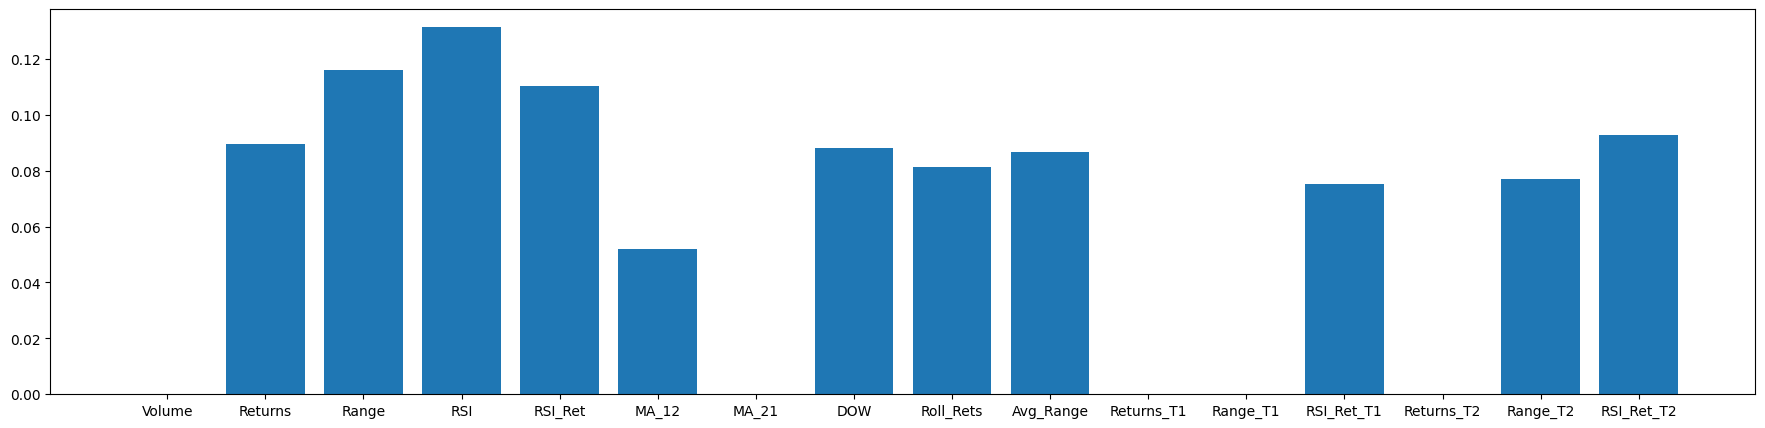

In [142]:
fig = plt.figure(figsize = (22,5))
importance_labels = X.columns
importance_features = classifier_1.feature_importances_
plt.bar(importance_labels, importance_features)
plt.show()

In [143]:
mean_feature_importance = importance_features.mean()
i =0
recommended_feature_labels = []
recommended_feature_score = []
for fi in importance_features:
  if fi > mean_feature_importance:
    recommended_feature_labels.append(importance_labels[i])
    recommended_feature_score.append(fi)
  i+=1

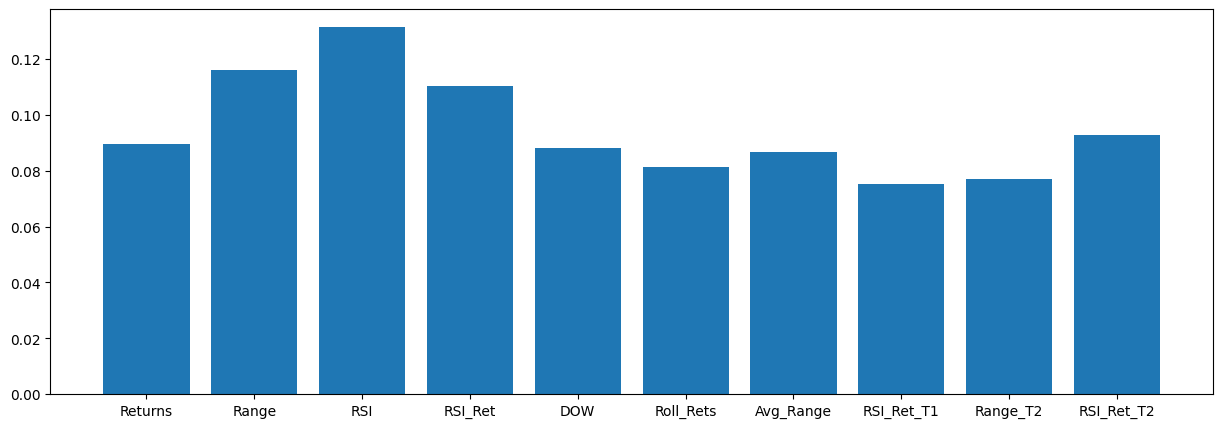

In [144]:
fig = plt.figure(figsize=(15,5))
plt.bar(recommended_feature_labels, recommended_feature_score)
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import plot_tree

In [146]:
df = pd.read_csv('data/BTC-USD.csv')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803,0.023314,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005,0.045999,NaN,NaN,...,NaN,1,NaN,NaN,0.023464,0.034803,NaN,NaN,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130,0.159122,NaN,NaN,...,NaN,2,NaN,NaN,0.021620,0.022005,NaN,0.023464,0.034803,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302,0.018098,NaN,NaN,...,NaN,3,NaN,NaN,0.106233,0.110130,NaN,0.021620,0.022005,NaN
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249,-0.092307,NaN,NaN,...,NaN,4,NaN,NaN,-0.122410,0.308302,NaN,0.106233,0.110130,NaN


In [147]:
df.loc[df['Range'].shift(-1) > df['Avg_Range'], 'TARGET'] = 1
df.loc[df['Range'].shift(-1) <= df['Avg_Range'], 'TARGET'] = 0

In [148]:
nan_location = np.where(np.isnan(df))
nan_location

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    2,    2,    2,    2,    2,    2,    2,    2,    2,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    4,    4,
           4,    4,    4,    4,    4,    4,    4,    5,    5,    5,    5,
           5,    5,    5,    5,    5,    6,    6,    6,    6,    6,    6,
           6,    6,    6,    7,    7,    7,    7,    7,    7,    7,    7,
           7,    8,    8,    8,    8,    8,    8,    8,    8,    8,    9,
           9,    9,    9,    9,    9,    9,    9,    9,   10,   10,   10,
          10,   10,   10,   10,   10,   10,   11,   11,   11,   11,   11,
          11,   11,   11,   12,   12,   12,   12,   12,   12,   12,   12,
          13,   13,   13,   13,   13,   13,   13,   14,   14,   14,   14,
          14,   14,   15,   15,   15,   15,   15,   16,   16,   16,   16,
          17,   17,   17,   17,   18, 

In [149]:
df['TARGET'].fillna(0, inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,DOW,Roll_Rets,Avg_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2,TARGET
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,36774325352,-0.009984,0.055632,33.189608,38.165993,0.977232,...,3,-0.239867,0.057147,-0.003144,0.026300,0.993166,0.019130,0.034313,1.065192,0.0
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,36582005748,-0.021856,0.036020,32.436595,36.240181,0.949541,...,4,-0.291202,0.057119,-0.009984,0.055632,0.977232,-0.003144,0.026300,0.993166,0.0
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,35519577634,0.006544,0.009117,32.894788,37.238957,1.027560,...,5,-0.298233,0.056286,-0.021856,0.036020,0.949541,-0.009984,0.055632,0.977232,0.0
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,18093886409,0.021900,0.022777,33.634047,40.613855,1.090628,...,6,-0.247068,0.055605,0.006544,0.009117,1.027560,-0.021856,0.036020,0.949541,1.0
2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,39277993274,0.077445,0.090298,36.313300,50.890862,1.253042,...,0,-0.146443,0.057666,0.021900,0.022777,1.090628,0.006544,0.009117,1.027560,0.0


In [150]:
df_tts - df.copy()
df_tts = df_tts[['Range', 'RSI', 'RSI_Ret', 'DOW', 'Avg_Range', 'RSI_Ret_T1', 'RSI_Ret_T2']]

In [151]:
X = df_tts.iloc[:, : -1]
y = df_tts.iloc[:, -1]

In [152]:
train_size_rate = 0.7
train_size = int(len(X)*train_size_rate)
test_size = len(X) - train_size

X_train = X.head(train_size)
y_train = y.head(train_size)
X_test = X.head(test_size)
y_test = y.head(test_size)

In [153]:
size_check = len(y_test) + len(y_train) == len(X)
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)
print('Size Matches: ', size_check)

Shape of X_train:  (1382, 6)
Shape of y_train:  (1382,)
Shape of X_test:  (593, 6)
Shape of y_test:  (593,)
Size Matches:  True


In [154]:
is_binary = True
is_optimised_for_precision= True

In [155]:
if is_binary:
  objective = 'binary:logistic'
  eval_metric = 'logloss'
  eval_metric_list = ['error', 'logloss', eval_metric]
else:
  objective = 'multi:softmax'
  eval_metric = 'mlogloss'
  eval_metric_list = ['merror', 'mlogloss', eval_metric]

In [156]:
if is_binary and is_optimised_for_precision:
  eval_metric = 'aucpr'
  scoring = 'precision'
elif is_binary and not is_optimised_for_precision:
  eval_metric = 'auc'
  scoring = 'f1'
else:
  scoring = 'accuracy'

In [157]:
ne = 65
lr = 0.05
md = 1
gm = 3

In [161]:
classifier = XGBClassifier(
    objective=objective,
    booster = 'gbtree',
    eval_metric=eval_metric,
    subsample = 0.8,
    colsample_bytree = 1,
    random_state = 1,
    n_estimators = ne,
    learning_rate = lr,
    gamma=gm,
    max_depth = md
)

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
classifier.set_params(eval_metric=eval_metric_list)
classifier.fit(X_train, y_train, eval_set=eval_set, verbose=False)

In [ ]:
train_yhat = classifier.predict(X_train)
train_yhat_proba = classifier.predict_proba(X_train)

In [35]:
!pip install torch --upgrade

In [3]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [7]:
df = pd.read_csv('pair_trade.csv')
df.drop(columns='Date', inplace=True)
df['lrets_a1'] = np.log(df['Asset1']/df['Asset1'].shift(1))

df['lrets_a2'] = np.log(df['Asset2']/df['Asset2'].shift(1))

df['lrets_a1_roll'] = df['lrets_a1'].rolling(window=21).mean()
df['lrets_a2_roll'] = df['lrets_a2'].rolling(window=21).mean()
df['a1_prod_rets'] = df['lrets_a1'].cumsum()
df['a2_prod_rets'] = df['lrets_a2'].cumsum()
df.dropna(inplace=True)
df.head()

,Asset1,Asset2,Spread,ZScore,lrets_a1,lrets_a2,lrets_a1_roll,lrets_a2_roll,a1_prod_rets,a2_prod_rets
21,54.227489,53.271168,-2.055377,0.403727,-0.000543,0.000741,0.000527,0.000836,0.011074,0.017551
22,53.589405,52.501556,-1.880340,0.649103,-0.011837,-0.014552,-0.000028,0.000188,-0.000763,0.002998
23,54.256935,53.133030,-1.879984,0.634294,0.012379,0.011956,0.000640,0.000793,0.011617,0.014954
24,53.658115,52.521286,-1.832474,0.689018,-0.011098,-0.011580,0.000077,0.000134,0.000519,0.003374
25,53.932976,52.767960,-1.818233,0.694927,0.005109,0.004686,-0.000113,-0.000080,0.005628,0.008059


In [8]:
df.shape

(1243, 10)

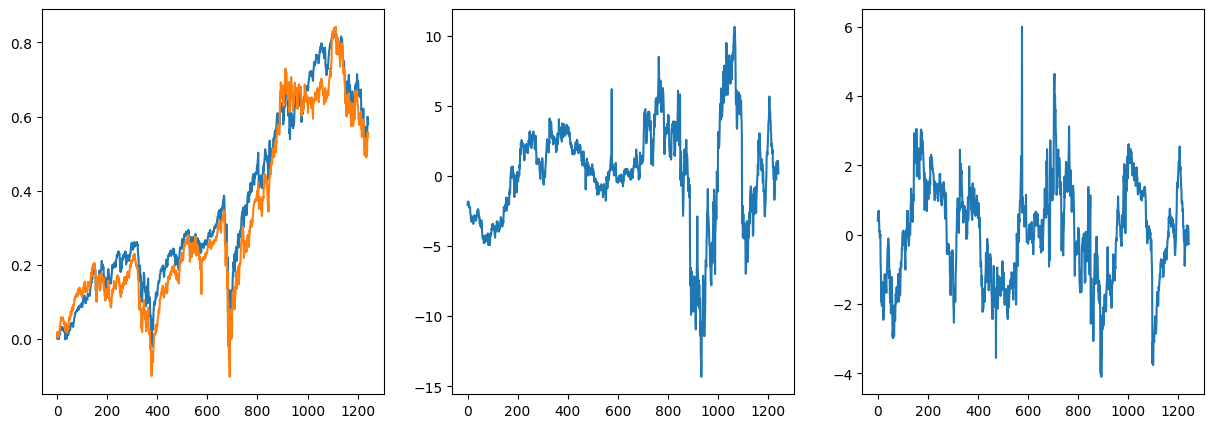

In [9]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(df['a1_prod_rets'].values)
plt.plot(df['a2_prod_rets'].values)

plt.subplot(1, 3, 2)
plt.plot(df['Spread'].values)

plt.subplot(1, 3, 3)
plt.plot(df['ZScore'].values)

In [10]:
future_step =1
df['TARGET']=0
df.loc[df['Spread'].shift(-future_step) > 0, 'TARGET']=1
df.dropna(inplace=True)
df.head()

,Asset1,Asset2,Spread,ZScore,lrets_a1,lrets_a2,lrets_a1_roll,lrets_a2_roll,a1_prod_rets,a2_prod_rets,TARGET
21,54.227489,53.271168,-2.055377,0.403727,-0.000543,0.000741,0.000527,0.000836,0.011074,0.017551,0
22,53.589405,52.501556,-1.880340,0.649103,-0.011837,-0.014552,-0.000028,0.000188,-0.000763,0.002998,0
23,54.256935,53.133030,-1.879984,0.634294,0.012379,0.011956,0.000640,0.000793,0.011617,0.014954,0
24,53.658115,52.521286,-1.832474,0.689018,-0.011098,-0.011580,0.000077,0.000134,0.000519,0.003374,0
25,53.932976,52.767960,-1.818233,0.694927,0.005109,0.004686,-0.000113,-0.000080,0.005628,0.008059,0


In [11]:
X_data = df.iloc[:-1, :-1].values
y = df.iloc[:,-1].values
len(X_data), len(y)

(1242, 1243)

In [12]:
scaler = StandardScaler()

In [13]:
X = scaler.fit_transform(X_data)
X[:2]

array([[-1.26409996, -1.13423463, -0.63372931,  0.25863604, -0.06917592,
         0.01966657,  0.02740599,  0.13101019, -1.46591758, -1.28660813],
       [-1.29635361, -1.17494635, -0.58661517,  0.42933897, -0.84553512,
        -0.93975017, -0.15742203, -0.06994393, -1.51550641, -1.34730519]])

In [14]:
class dataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype=torch.float)
    self.y = torch.tensor(y, dtype=torch.float)
    self.length = self.X.shape[0]

  def __getitem__(self, idx):
     return self.X[idx], self.y[idx]

  def __len__(self):
    return self.length

trainset = dataset(X,y)
trainloader = DataLoader(trainset, batch_size=64, shuffle = False)

In [15]:
trainloader.dataset.X[:2]

tensor([[-1.2641, -1.1342, -0.6337,  0.2586, -0.0692,  0.0197,  0.0274,  0.1310,
         -1.4659, -1.2866],
        [-1.2964, -1.1749, -0.5866,  0.4293, -0.8455, -0.9398, -0.1574, -0.0699,
         -1.5155, -1.3473]])

In [16]:
trainloader.dataset.y[:2]

tensor([0., 0.])

In [17]:
class Net(nn.Module):
  def __init__(self, input_shape):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(input_shape, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 1)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [20]:
learning_rate = 0.01
epochs=100

model = Net(input_shape=X.shape[1])
X.shape

(1242, 10)

In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

In [24]:
losses = []
accuracy = []
for i in range(epochs):
  for j, (X_train, y_train) in enumerate(trainloader):
    output = model(X_train)
    loss = loss_fn(output, y_train.reshape(-1,1))
    predicted = model(torch.tensor(X, dtype=torch.float32))
    acc = (predicted.detach().numpy().round() == y).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10 ==0:
      losses.append(loss)
      accuracy.append(acc)
      print(f'Epoch: {i}, Loss: {loss}, Accuracy: {acc}')

Epoch: 0, Loss: 1.3747213367665267e-09, Accuracy: 0.5168220618393762
Epoch: 0, Loss: 3.4583352349383534e-14, Accuracy: 0.5166633631427783
Epoch: 0, Loss: 0.1565001755952835, Accuracy: 0.5168220618393762
Epoch: 0, Loss: 0.14653612673282623, Accuracy: 0.5165046644461804
Epoch: 0, Loss: 0.1708706021308899, Accuracy: 0.5168220618393762
Epoch: 0, Loss: 3.539027559895658e-08, Accuracy: 0.5172981579291699
Epoch: 0, Loss: 0.00042901886627078056, Accuracy: 0.5172981579291699
Epoch: 0, Loss: 0.2085420787334442, Accuracy: 0.5174568566257678
Epoch: 0, Loss: 0.16286318004131317, Accuracy: 0.5182503501087572
Epoch: 0, Loss: 0.2119835913181305, Accuracy: 0.518567747501953
Epoch: 0, Loss: 0.40026992559432983, Accuracy: 0.5198373370747361
Epoch: 0, Loss: 4.0085560613078997e-05, Accuracy: 0.5203134331645297
Epoch: 0, Loss: 0.003022241173312068, Accuracy: 0.5207895292543234
Epoch: 0, Loss: 0.06869008392095566, Accuracy: 0.5207895292543234
Epoch: 0, Loss: 0.0003622395743150264, Accuracy: 0.521265625344117

In [25]:
df = pd.read_csv('HMM-SPY.csv')
useful_features = ['Open', 'Adj Close', 'MA_12', 'MA_21', 'HMM', 'lrets_bench', 'lrets_strat']
df= df[useful_features]
df.head()

,Open,Adj Close,MA_12,MA_21,HMM,lrets_bench,lrets_strat
0,257.559998,243.453964,234.584498,238.076619,0,0.004663,-0.000000
1,256.260010,244.312759,236.014248,237.912279,0,0.003521,0.000000
2,257.679993,244.407166,237.952042,237.749753,0,0.000386,-0.000000
3,256.859985,242.916061,238.834426,237.456802,0,-0.006120,0.003731
4,257.820007,245.700058,239.800172,237.300443,0,0.011396,0.011607


In [26]:
df['lrets_bench_roll'] = df['lrets_bench'].rolling(window=10).mean()
df['TARGET'] = df['lrets_strat'].shift(1)
df.dropna(inplace=True)
df.head()

,Open,Adj Close,MA_12,MA_21,HMM,lrets_bench,lrets_strat,lrets_bench_roll,TARGET
9,264.010010,248.587921,245.479855,239.758610,1,0.002090,-0.000000,0.002553,-0.003063
10,263.209991,248.720001,246.201023,240.785479,0,0.000531,0.009077,0.002140,-0.000000
11,265.609985,250.824524,246.909611,242.198378,0,0.008426,-0.008393,0.002630,0.009077
12,263.390015,248.918167,247.364961,242.988412,0,-0.007629,0.002010,0.001829,-0.008393
13,263.920013,248.587921,247.721224,243.677785,0,-0.001328,0.004461,0.002308,0.002010


In [27]:
non_stationaries = []
for col in df.columns:
  dftest = adfuller(df[col].values)
  p_value = dftest[1]
  t_test = dftest[0] < dftest[4]['1%']
  if p_value > 0.05 or not t_test:
    non_stationaries.append(col)
print(f'Non-Stationary Features Found: {len(non_stationaries)}')
non_stationaries

Non-Stationary Features Found: 4


['Open', 'Adj Close', 'MA_12', 'MA_21']

In [28]:
df[non_stationaries] = np.log(df[non_stationaries])

In [29]:
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

,Open,Adj Close,MA_12,MA_21,HMM,lrets_bench,lrets_strat,lrets_bench_roll,TARGET
9,0.196512,0.180398,0.052376,0.000000,0.333333,0.582263,0.537793,0.664535,-0.003063
10,0.192422,0.181072,0.056659,0.006429,0.000000,0.574568,0.707795,0.655089,-0.000000
11,0.204655,0.191766,0.060856,0.015230,0.000000,0.613531,0.380597,0.666303,0.009077
12,0.193344,0.182083,0.063546,0.020128,0.000000,0.534292,0.575442,0.647975,-0.008393
13,0.196053,0.180398,0.065648,0.024390,0.000000,0.565394,0.621345,0.658932,0.002010


In [30]:
X_data = df.iloc[:, :-1].values
y_data = df.iloc[:, -1].values
print(f'X_data: \n {X_data[:1]} \n')
print(f'y: \n {y_data[0:1]} \n')

X_data: 
 [[0.19651226 0.18039835 0.05237557 0.         0.33333333 0.5822633
  0.53779279 0.66453513]] 

y: 
 [-0.00306336] 



In [33]:
def split_sequence(input_data, n_steps):
  X = list()
  for i in range(len(input_data)):
    end_ix = i + n_steps
    if end_ix > len(input_data)-1:
      break
    seq_X = input_data[i:end_ix, :-1]
    X.append(seq_X)
  return np.array(X)

In [34]:
n_timestamps = 8
X = split_sequence(X_data, n_timestamps)
y = y_data[n_timestamps: ]

In [35]:
print('')
print('X summary:')
counts = 0
for i in range(len(X)):
  counts += 1
  if counts <= 2:
    print(X[i])
  else:
    break

print('')
print('y summary:')
counts = 0
for i in range(len(y)):
  counts += 1
  if counts <= 2:
    print(y[i])
  else:
    break


X summary:
[[0.19651226 0.18039835 0.05237557 0.         0.33333333 0.5822633
  0.53779279]
 [0.19242205 0.18107249 0.05665922 0.00642873 0.         0.57456794
  0.70779456]
 [0.20465531 0.19176599 0.06085593 0.01522955 0.         0.6135312
  0.38059651]
 [0.19334353 0.18208326 0.06354646 0.02012824 0.         0.53429219
  0.57544212]
 [0.19605276 0.18039835 0.06564807 0.02438977 0.         0.56539407
  0.62134465]
 [0.20206512 0.20033197 0.06962947 0.02988081 0.         0.64946409
  0.70728882]
 [0.21426199 0.21142974 0.07541098 0.03540147 0.         0.61510331
  0.72171969]
 [0.2274973  0.21204049 0.07987559 0.04086625 0.         0.57432144
  0.53501885]]
[[0.19242205 0.18107249 0.05665922 0.00642873 0.         0.57456794
  0.70779456]
 [0.20465531 0.19176599 0.06085593 0.01522955 0.         0.6135312
  0.38059651]
 [0.19334353 0.18208326 0.06354646 0.02012824 0.         0.53429219
  0.57544212]
 [0.19605276 0.18039835 0.06564807 0.02438977 0.         0.56539407
  0.62134465]
 [0.20

In [36]:
trainset = dataset(X,y)
trainloader = DataLoader(trainset, batch_size=20, shuffle=False)

In [37]:
print(trainset.X.shape)
trainset.X[0:3]

torch.Size([833, 8, 7])


tensor([[[0.1965, 0.1804, 0.0524, 0.0000, 0.3333, 0.5823, 0.5378],
         [0.1924, 0.1811, 0.0567, 0.0064, 0.0000, 0.5746, 0.7078],
         [0.2047, 0.1918, 0.0609, 0.0152, 0.0000, 0.6135, 0.3806],
         [0.1933, 0.1821, 0.0635, 0.0201, 0.0000, 0.5343, 0.5754],
         [0.1961, 0.1804, 0.0656, 0.0244, 0.0000, 0.5654, 0.6213],
         [0.2021, 0.2003, 0.0696, 0.0299, 0.0000, 0.6495, 0.7073],
         [0.2143, 0.2114, 0.0754, 0.0354, 0.0000, 0.6151, 0.7217],
         [0.2275, 0.2120, 0.0799, 0.0409, 0.0000, 0.5743, 0.5350]],

        [[0.1924, 0.1811, 0.0567, 0.0064, 0.0000, 0.5746, 0.7078],
         [0.2047, 0.1918, 0.0609, 0.0152, 0.0000, 0.6135, 0.3806],
         [0.1933, 0.1821, 0.0635, 0.0201, 0.0000, 0.5343, 0.5754],
         [0.1961, 0.1804, 0.0656, 0.0244, 0.0000, 0.5654, 0.6213],
         [0.2021, 0.2003, 0.0696, 0.0299, 0.0000, 0.6495, 0.7073],
         [0.2143, 0.2114, 0.0754, 0.0354, 0.0000, 0.6151, 0.7217],
         [0.2275, 0.2120, 0.0799, 0.0409, 0.0000, 0.5743, 0.

In [38]:
trainset.y[:10]

tensor([-0.0001,  0.0086,  0.0013, -0.0068, -0.0081,  0.0091,  0.0045,  0.0095,
        -0.0046,  0.0094])

In [39]:
from torch import nn
from torch.autograd import Variable
class LSTM_Net (nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
    super(LSTM_Net, self).__init__()

    self.hidden_dim = hidden_dim

    self.layer_dim = layer_dim

    self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

    self.fc1 = nn.Linear(hidden_dim, 5)

    self.fc2 = nn.Linear(5, output_dim)

  def forward(self, x):
    h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
    c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

    # Outputs Classification
    # out, (hn, cn) = self.lstm(x, (h0, c0))
    # out = self.fc1(out[:, -1, :])
    # out = torch.sigmoid(self.fc2(out))

    # Regressor - propagate through LSTM
    ula, (h_out, _) = self.lstm(x, (h0, c0))
    h_out = h_out.view(-1, self.hidden_dim)
    out = self.fc1(h_out)
    out = self.fc2(out)

    return out


In [42]:
input_dim = X.shape[2]
hidden_dim = 100
layer_dim = 1
output_dim = 1
model = LSTM_Net(input_dim=input_dim, hidden_dim=hidden_dim, layer_dim=layer_dim, output_dim=output_dim)
print(f'Model Parameters: {len(list(model.parameters()))}')

Model Parameters: 8


In [43]:
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())

torch.Size([400, 7])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([5, 100])
torch.Size([5])
torch.Size([1, 5])
torch.Size([1])


In [45]:
epochs =100
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1)
losses = []
iter =0
for i in range(epochs):
  for j, (X_train, y_train) in enumerate(trainloader):
    output = model(X_train)
    loss = criterion(output, y_train.unsqueeze(dim=1))
    predicted = model(torch.tensor(X, dtype=torch.float32))
    acc = (predicted.detach().numpy().round() == y).mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    iter += 1
    if i % 10 ==0:
      print(f'Loss: {loss.detach()}')

Loss: 0.06330861896276474
Loss: 74.45130920410156
Loss: 1.0527293682098389
Loss: 6.000240802764893
Loss: 5.925534248352051
Loss: 1.919507384300232
Loss: 0.155656099319458
Loss: 0.06190408021211624
Loss: 1.4708954095840454
Loss: 0.02425410971045494
Loss: 0.9466748237609863
Loss: 0.046892181038856506
Loss: 0.4843083322048187
Loss: 0.4530342221260071
Loss: 0.000581554661039263
Loss: 0.43005475401878357
Loss: 0.17909124493598938
Loss: 0.0893622487783432
Loss: 0.34763842821121216
Loss: 0.028936486691236496
Loss: 0.1715346872806549
Loss: 0.18560627102851868
Loss: 0.012365791015326977
Loss: 0.2220337837934494
Loss: 0.029144445434212685
Loss: 0.11748498678207397
Loss: 0.10845772922039032
Loss: 0.020838061347603798
Loss: 0.1447371542453766
Loss: 0.0011045846622437239
Loss: 0.11419417709112167
Loss: 0.02578379586338997
Loss: 0.06403322517871857
Loss: 0.05750466138124466
Loss: 0.027687910944223404
Loss: 0.06405951082706451
Loss: 0.004524155519902706
Loss: 0.07059917598962784
Loss: 8.1100166426040

In [ ]:
plt.plot(losses)
plt.show()

In [7]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd

In [8]:
time = np.arange(0,50, 0.1)
amplitude = np.sin(time)
amplitude = amplitude + 1
max_amp = max(amplitude)
amplitude = amplitude/max_amp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df = pd.DataFrame(amplitude)
df.columns = ['Close']
df['Close_Rt'] = df['Close'].pct_change()
df = df.replace(np.inf, np.nan)
df = df.dropna()
df = df.reset_index(drop=True)

print(f'Length: {len(df)}')
print('Min Close: ', df['Close'].min())
print('Max Close: ', df['Close'].max())
df.head()

Length: 499
Min Close:  4.896739968063352e-06
Max Close:  1.0


,Close,Close_Rt
0,0.549918,0.099833
1,0.599337,0.089864
2,0.647762,0.080799
3,0.694711,0.072479
4,0.739715,0.064780


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

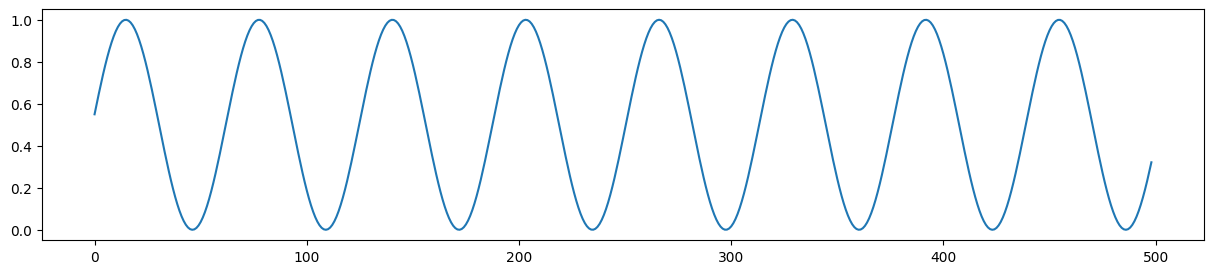

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,3)
df['Close'].plot()

In [11]:
import gym
from gym import spaces
import numpy as np
import random
import torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
MAX_INT = 3242435655
MAX_OPEN_POSITIONS = 1
INITIAL_ACCOUNT_BALANCE = 1000
PERCENT_CAPITAL = 0.1
TRADING_COSTS_RATE = 0.001
KILL_THRESH = 0.4

In [19]:
import gym
from gym import spaces # use Gym 0.24.0 from pip install
import numpy as np
import random
import torch


# Initialise variables
MAX_INT = 2147483647
MAX_OPEN_POSITIONS = 1
INITIAL_ACCOUNT_BALANCE = 1000
PERCENT_CAPITAL = 0.1
TRADING_COSTS_RATE = 0.001
KILL_THRESH = 0.4 # Threshold for balance preservation


# Structure environment
class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df):
        super(StockTradingEnv, self).__init__()

        # Generic variables
        self.df = df

        # Account variables
        self.available_balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.realized_profit = 0
        self.unrealized_profit = 0
        self.last_profit = 0

        # Position variables
        self.open_quantities = []
        self.open_prices = []
        self.trading_costs = 0
        self.open_positions = 0
        self.closed_positions = 0
        self.incorrect_position_calls = 0
        self.num_trades = 0
        self.held_for_period = 0

        # Current Step
        self.current_step = 0
        self.max_steps = len(df)

        # Actions of the format Long, Hold, Close
        self.action_space = spaces.Discrete(3)

        # Prices contains the Close and Close Returns etc
        self.observation_space = spaces.Box(low=-1, high=1, shape=(8, ), dtype=np.float32)

    # Calculate Reward
    def _calculate_reward(self):
        reward = 0
        if self.num_trades:
            reward += self.realized_profit / self.num_trades
            reward += self.unrealized_profit / self.num_trades * 0.3
            reward += 1 if self.last_profit > 0 else 0
        reward -= 1 if self.incorrect_position_calls > 0 else 0
        if reward <= 0:
            reward -= 2
        return reward

    # Structure sign observation data
    def _next_observation(self):
        close_item = self.df.loc[self.current_step, "Close"].item()
        close_rt_item = self.df.loc[self.current_step, "Close_Rt"].item()
        close_T1_item = self.df.loc[self.current_step - 1, "Close_Rt"].item()
        close_T2_item = self.df.loc[self.current_step - 2, "Close_Rt"].item()
        close_T3_item = self.df.loc[self.current_step - 3, "Close_Rt"].item()
        close_T4_item = self.df.loc[self.current_step - 4, "Close_Rt"].item()

        current_position = 1 if self.open_positions else 0
        num_trades = self.num_trades / len(self.df) if self.num_trades > 0 else 0

        obs = np.array([close_item, close_rt_item, close_T1_item, close_T2_item, close_T3_item, close_T4_item,
                        current_position, num_trades])
        return obs

    # Calculate current open value
    def _calculate_open_value(self):
        open_trades_value = 0
        counts = 0
        for qty in self.open_quantities:
            acquisition_price = self.open_prices[counts]
            open_trades_value += acquisition_price * qty
            counts += 1
        return open_trades_value

    # Calculate gross profit
    def _profit_calculation(self, current_price, calc_type):
        open_trades_value = self._calculate_open_value()
        total_quantity_held = sum(self.open_quantities)
        current_value = total_quantity_held * current_price
        gross_profit = current_value - open_trades_value

        if calc_type == "close_position":
            trading_costs = current_value * TRADING_COSTS_RATE
            self.trading_costs += trading_costs
        elif calc_type == "hold_position" or calc_type == "open_position":
            trading_costs = open_trades_value * TRADING_COSTS_RATE

        net_profit = gross_profit - trading_costs

        return net_profit

    # Set the current price to a random price within the time step
    def _take_action(self, action):
        current_price = self.df.loc[self.current_step, "Close"].item()

        # Reset last profit
        self.last_profit = 0
        self.incorrect_position_calls = 0

        # Go Long
        if action == 0:
            if self.open_positions < MAX_OPEN_POSITIONS:
                net_profit = self._profit_calculation(current_price, "open_position")
                net_worth = self.net_worth + net_profit
                trading_allowance = net_worth * PERCENT_CAPITAL

                self.open_quantities.append(trading_allowance / current_price)
                self.open_prices.append(current_price)
                self.trading_costs += trading_allowance * TRADING_COSTS_RATE
                self.num_trades += 1
            else:
                self.incorrect_position_calls += 1

        # Hold Positions
        if action == 1:
            net_profit = self._profit_calculation(current_price, "hold_position")
            self.unrealized_profit += net_profit
            if self.open_positions > 0:
                self.held_for_period += 1

        # Close Positions
        if action == 2:
            if self.open_positions != 0:
                net_profit = self._profit_calculation(current_price, "close_position")
                self.last_profit = net_profit
                self.realized_profit += net_profit
                self.unrealized_profit = 0
                self.open_quantities = []
                self.open_prices = []
                self.held_for_period = 0
                self.closed_positions += 1
            else:
                self.incorrect_position_calls += 1

        # Update variables
        open_trades_value = self._calculate_open_value()
        self.open_positions = len(self.open_quantities)
        self.net_worth = INITIAL_ACCOUNT_BALANCE + self.unrealized_profit + self.realized_profit
        self.available_balance = INITIAL_ACCOUNT_BALANCE - open_trades_value + self.realized_profit

    # Execute one time step within the environment
    def step(self, action):
        self._take_action(action)

        reward = self._calculate_reward()

        self.current_step += 1

        is_max_steps_taken = self.current_step >= self.max_steps - 1
        is_account_balance_reached = self.net_worth <= INITIAL_ACCOUNT_BALANCE * KILL_THRESH
        done = True if is_max_steps_taken or is_account_balance_reached else False

        obs = self._next_observation()

        return obs, reward, done, {}

    # Reset the state of the environment to an initial state
    def reset(self):
        self.account_balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.realized_profit = 0
        self.unrealized_profit = 0
        self.open_quantities = []
        self.open_prices = []
        self.trading_costs = 0
        self.open_positions = 0
        self.incorrect_position_calls = 0
        self.current_step = 5

        return self._next_observation()

    # Render the environment to the screen
    def render(self, mode='human', close=False):
        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE
        return profit

In [20]:
env = StockTradingEnv(df)
actions = [0, 1, 2]
observation = env.reset()
print('Initial Observation: ', env.reset())

for action in actions:
  obs_, reward, done, info= env.step(action)

  print('')
  print('Action Taken: ', action)
  print('Reward Received: ', reward)
  print('Next_State: ', obs_)
  print('Available Balance: ', env.available_balance)
  print('Net Worth: ', env.net_worth)
  print('Realized Profit: ', env.realized_profit)
  print('Unrealized Profit: ', env.unrealized_profit)
  print('Open Quantities: ', env.open_quantities)
  print('Open Prices: ', env.open_prices)
  print('Trading Costs: ', env.trading_costs)
  print('Open Positions: ', env.open_positions)
  print('Incorrect Calls: ', env.incorrect_position_calls)

Initial Observation:  [0.78232368 0.05760137 0.06478049 0.0724791  0.08079866 0.08986444
 0.         0.        ]

Action Taken:  0
Reward Received:  -2.0
Next_State:  [0.82211142 0.0508584  0.05760137 0.06478049 0.0724791  0.08079866
 1.         0.00200401]
Available Balance:  900.0
Net Worth:  1000
Realized Profit:  0
Unrealized Profit:  0
Open Quantities:  [127.82432899941284]
Open Prices:  [0.782323684253092]
Trading Costs:  0.1
Open Positions:  1
Incorrect Calls:  0

Action Taken:  1
Reward Received:  1.4957520205876034
Next_State:  [0.85868073 0.04448219 0.0508584  0.05760137 0.06478049 0.0724791
 1.         0.00200401]
Available Balance:  900.0
Net Worth:  1004.9858400686253
Realized Profit:  0
Unrealized Profit:  4.985840068625345
Open Quantities:  [127.82432899941284]
Open Prices:  [0.782323684253092]
Trading Costs:  0.1
Open Positions:  1
Incorrect Calls:  0

Action Taken:  2
Reward Received:  10.650528090672934
Next_State:  [0.89166624 0.03841418 0.04448219 0.0508584  0.05760

In [21]:
def plot_learning_curve(x, scores, figure_file):
  running_avg = np.zeros(len(scores))
  for i in range(len(running_avg)):
    running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
  plt.plot(x, running_avg)
  plt.title('Running Average of Prev 100 scores')
  plt.savefig(figure_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
import os
import torch as T
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

In [26]:
class PPOMemory:
  def __init__(self, batch_size) -> None:
     self.states = []
     self.probs = []
     self.vals = []
     self.actions = []
     self.rewards = []
     self.dones = []
     self.batch_size = batch_size

  def generate_batches(self):
    n_states = len(self.states)
    batch_start = np.arange(0, n_states, self.batch_size)
    indices = np.arange(n_states, dtype=np.int64)
    np.random.shuffle(indices)
    batches = [indices[i:i+self.batch_size] for i in batch_start]

    return np.array(self.states), np.array(self.actions), np.array(self.probs), np.array(self.vals), np.array(self.rewards), np.array(self.dones), batches

  def store_memory(self, state, action, probs, vals, reward, done):
    self.states.append(state)
    self.actions.append(action)
    self.probs.append(probs)
    self.vals.append(vals)
    self.rewards.append(reward)
    self.dones.append(done)

  def clear_memory(self):
    self.states = []
    self.probs = []
    self.vals = []
    self.actions = []
    self.rewards = []
    self.dones = []



In [48]:
class ActorNetwork(nn.Module):
  def __init__(self, n_actions, input_dims, alpha, fc1_dims=256, fc2_dims=256, chkpt_dir='tmp/', *args, **kwargs) -> None:
     super(ActorNetwork, self).__init__(*args, **kwargs)


     self.checkpoint_file = os.path.join(chkpt_dir, 'actor_torch_ppo_sine')

     self.actor = nn.Sequential(
        nn.Linear(*input_dims, fc1_dims),
        nn.ReLU(),
        nn.Linear(fc1_dims, fc2_dims),
        nn.ReLU(),
        nn.Linear(fc2_dims, n_actions),
        nn.ReLU(),
        nn.Linear(fc2_dims, n_actions),
        nn.Softmax(dim=-1)
     )
     self.optimizer = optim.Adam(self.parameters(), lr=alpha)
     self.device = T.device('cuda:0' if T.cuda_is_available() else 'cpu')
     self.to(self.device)

  def forward(self, state):
    dist = self.actor(state)
    dist = Categorical(dist)
    return dist

  def save_checkpoint(self):
    T.save(self.state_dict(), self.checkpoint_file)

  def load_checkpoint(self):
    self.load_state_dict(T.load(self.checkpoint_file))


In [49]:
class CriticNetwork(nn.Module):
    def __init__(self, input_dims, alpha, fc1_dims=256, fc2_dims=256,
            chkpt_dir='tmp/'):
        super(CriticNetwork, self).__init__()

        self.checkpoint_file = os.path.join(chkpt_dir, 'critic_torch_ppo_sine')
        self.critic = nn.Sequential(
                nn.Linear(*input_dims, fc1_dims),
                nn.ReLU(),
                nn.Linear(fc1_dims, fc2_dims),
                nn.ReLU(),
                nn.Linear(fc2_dims, 1)
        )

        self.optimizer = optim.AdamW(self.parameters(), lr=alpha)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        value = self.critic(state)

        return value

    def save_checkpoint(self):
        T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
        self.load_state_dict(T.load(self.checkpoint_file))

In [50]:
class Agent:
    def __init__(self, n_actions, input_dims, gamma=0.99, alpha=0.0003, gae_lambda=0.95,
            policy_clip=0.2, batch_size=64, n_epochs=10):
        self.gamma = gamma
        self.policy_clip = policy_clip
        self.n_epochs = n_epochs
        self.gae_lambda = gae_lambda

        self.actor = ActorNetwork(n_actions, input_dims, alpha)
        self.critic = CriticNetwork(input_dims, alpha)
        self.memory = PPOMemory(batch_size)

    def remember(self, state, action, probs, vals, reward, done):
        self.memory.store_memory(state, action, probs, vals, reward, done)

    def save_models(self):
        print('... saving models ...')
        self.actor.save_checkpoint()
        self.critic.save_checkpoint()

    def load_models(self):
        print('... loading models ...')
        self.actor.load_checkpoint()
        self.critic.load_checkpoint()

    def choose_action(self, observation):
        state = T.tensor([observation], dtype=T.float).to(self.actor.device)
        state = state.flatten(0)

        dist = self.actor(state)
        value = self.critic(state)
        action = dist.sample()

        probs = T.squeeze(dist.log_prob(action)).item()
        action = T.squeeze(action).item()
        value = T.squeeze(value).item()

        return action, probs, value

    def learn(self):
        for _ in range(self.n_epochs):
            state_arr, action_arr, old_prob_arr, vals_arr,\
            reward_arr, dones_arr, batches = \
                    self.memory.generate_batches()

            values = vals_arr
            advantage = np.zeros(len(reward_arr), dtype=np.float32)

            for t in range(len(reward_arr)-1):
                discount = 1
                a_t = 0
                for k in range(t, len(reward_arr)-1):
                    a_t += discount*(reward_arr[k] + self.gamma*values[k+1]*\
                            (1-int(dones_arr[k])) - values[k])
                    discount *= self.gamma*self.gae_lambda
                advantage[t] = a_t
            advantage = T.tensor(advantage).to(self.actor.device)

            values = T.tensor(values).to(self.actor.device)
            for batch in batches:
                states = T.tensor(state_arr[batch], dtype=T.float).to(self.actor.device)
                old_probs = T.tensor(old_prob_arr[batch]).to(self.actor.device)
                actions = T.tensor(action_arr[batch]).to(self.actor.device)

                dist = self.actor(states)
                critic_value = self.critic(states)

                critic_value = T.squeeze(critic_value)

                new_probs = dist.log_prob(actions)
                prob_ratio = new_probs.exp() / old_probs.exp()

                weighted_probs = advantage[batch] * prob_ratio
                weighted_clipped_probs = T.clamp(prob_ratio, 1-self.policy_clip,
                        1+self.policy_clip)*advantage[batch]
                actor_loss = -T.min(weighted_probs, weighted_clipped_probs).mean()

                returns = advantage[batch] + values[batch]
                critic_loss = (returns-critic_value)**2
                critic_loss = critic_loss.mean()

                total_loss = actor_loss + 0.5*critic_loss
                self.actor.optimizer.zero_grad()
                self.critic.optimizer.zero_grad()
                total_loss.backward()
                self.actor.optimizer.step()
                self.critic.optimizer.step()

        self.memory.clear_memory()

In [51]:
# Testing

env = StockTradingEnv(df)

batch_size = 5
n_epochs = 4
alpha = 0.0003

agent = Agent(n_actions=env.action_space.n, batch_size=batch_size,
                alpha=alpha, n_epochs=n_epochs,
                input_dims=env.observation_space.shape)

observation = env.reset()
action, prob, val = agent.choose_action(observation)
n_actions = env.action_space.n
print("Oberservation: ", observation)
print("Number of Actions: ", n_actions)
print("Action Chosen: ", action)
print("Probability of Action: ", prob)
print("Value of Action: ", val)

observation_, reward, done, info = env.step(action)
print("Next Oberservation", observation_)
print("Reward", reward)
print("Done", done)
print("Info", info)

AttributeError: ignored

In [38]:
import gym
import numpy as np

if __name__ == '__main__':
    env = StockTradingEnv(df)
    N = 20
    batch_size = 5
    n_epochs = 8
    alpha = 0.0003
    agent = Agent(n_actions=env.action_space.n, batch_size=batch_size,
                    alpha=alpha, n_epochs=n_epochs,
                    input_dims=env.observation_space.shape)
    n_games = 200

    figure_file = 'sinewave.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0

    print("... starting ...")
    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0:
                agent.learn()
                learn_iters += 1
            observation = observation_

        # Save history
        score_history.append(score)
        avg_score = np.mean(score_history[-50:])

        if avg_score > best_score and i > 50:
            best_score = avg_score
            agent.save_models()

        print(f"episide: {i}, score: {score}, avg score: {avg_score}, time_steps: {n_steps}, learning steps: {learn_iters}")

    x = [i+1 for i in range(len(score_history))]
    plot_learning_curve(x, score_history, figure_file)


NameError: ignored

In [ ]:
n_actions = env.action_space.n
input_dims = env.observation_space.shape
alpha = 0.0003
model = ActorNetwork(n_actions, input_dims, alpha)
model.load_state_dict(T.load("tmp/actor_torch_ppo_sine"))
model.eval()

In [ ]:
open_probs = []
hold_probs = []
close_probs = []
actions = []
is_open = 0
num_trades = 0
held_for = 0
num_trades_perc = 0
for step in range(5, len(df)):
    close_item = df.loc[step, "Close_Rt"].item()
    close_rt_item = df.loc[step, "Close_Rt"].item()
    close_T1_item = df.loc[step - 1, "Close_Rt"].item()
    close_T2_item = df.loc[step - 2, "Close_Rt"].item()
    close_T3_item = df.loc[step - 3, "Close_Rt"].item()
    close_T4_item = df.loc[step - 4, "Close_Rt"].item()
    state = np.array([close_item, close_rt_item, close_T1_item, close_T2_item, close_T3_item, close_T4_item,
                      is_open, num_trades_perc])
    state = T.tensor(state).float()
    dist = model(state)
    probs = dist.probs.detach().numpy()

    print(probs)

    if action == 0:
        is_open = 1
        num_trades += 1
        num_trades_perc = num_trades / len(df)
    if action == 1 and is_open:
        held_for += 1
    if action == 2:
        is_open = 0
        held_for = 0

    open_probs.append(probs[0])
    hold_probs.append(probs[1])
    close_probs.append(probs[2])
print(len(open_probs))

In [ ]:
df_new = df.copy()
df_new = df_new.iloc[5:, :]
df_new["Opens"] = open_probs
df_new["Holds"] = hold_probs
df_new["Closes"] = close_probs
df_new.head()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)
df_new[["Close", "Closes", "Opens", "Holds"]].plot()